In [175]:
import graphviz

import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import Ridge, Lasso, ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from scipy import stats
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

from scipy.stats import f_oneway

import statsmodels.api as sm

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from statsmodels.api import Logit

from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


import warnings
warnings.filterwarnings("ignore")

In [47]:
# 글씨체 분석
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False )

In [48]:
# 데이터 불러오기
df_raw = pd.read_csv("/home/piai/바탕화면/실습화일/2. Big Data 분석/SCALE불량.csv", encoding = "euc-kr")
df_raw.head()

,plate_no,rolling_date,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,...,fur_heat_temp,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group
0,PLT_1001,03JAN2023:07:07:53,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,116,1133,59,259,1133,TMCP(온도제어),934,8,1조
1,PLT_1002,03JAN2023:07:21:22,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,...,1144,122,1135,53,238,1135,TMCP(온도제어),937,8,1조
2,PLT_1003,03JAN2023:07:31:15,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1129,116,1121,55,258,1121,TMCP(온도제어),889,8,1조
3,PLT_1004,03JAN2023:07:41:01,양품,NV-E36-TM,영국,T,33,3600,19200,적용,...,1152,125,1127,68,266,1127,TMCP(온도제어),885,8,1조
4,PLT_1005,03JAN2023:07:52:40,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,...,1140,134,1128,48,246,1128,TMCP(온도제어),873,8,1조


In [49]:
# info로 데이터 속성, shape으로 데이터 행과 열 형태 확인

print("데이터 속성 확인")
print(df_raw.info())
print()
print("데이터 행과 열 형태 확인")
print(df_raw.shape)

데이터 속성 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   plate_no         1000 non-null   object
 1   rolling_date     1000 non-null   object
 2   scale            1000 non-null   object
 3   spec_long        1000 non-null   object
 4   spec_country     1000 non-null   object
 5   steel_kind       1000 non-null   object
 6   pt_thick         1000 non-null   int64 
 7   pt_width         1000 non-null   int64 
 8   pt_length        1000 non-null   int64 
 9   hsb              1000 non-null   object
 10  fur_no           1000 non-null   object
 11  fur_input_row    1000 non-null   object
 12  fur_heat_temp    1000 non-null   int64 
 13  fur_heat_time    1000 non-null   int64 
 14  fur_soak_temp    1000 non-null   int64 
 15  fur_soak_time    1000 non-null   int64 
 16  fur_total_time   1000 non-null   int64 
 17  fur_ex_temp      1000 no

In [50]:
# 중복확인
df_raw.duplicated().sum()

0

In [51]:
# 결측치 확인
df_raw.isnull().sum()

plate_no           0
rolling_date       0
scale              0
spec_long          0
spec_country       0
steel_kind         0
pt_thick           0
pt_width           0
pt_length          0
hsb                0
fur_no             0
fur_input_row      0
fur_heat_temp      0
fur_heat_time      0
fur_soak_temp      0
fur_soak_time      0
fur_total_time     0
fur_ex_temp        0
rolling_method     0
rolling_temp       0
descaling_count    0
work_group         0
dtype: int64

In [52]:
# rolling_date를 년월일로 변환
df_raw['rolling_date'] = pd.to_datetime(df_raw['rolling_date'], format='%d%b%Y:%H:%M:%S')
df_raw['date'] = df_raw['rolling_date'].dt.date
df_raw.drop('rolling_date', axis = 1, inplace = True)
df_raw.head()

,plate_no,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date
0,PLT_1001,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,2023-01-03
1,PLT_1002,양품,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,2023-01-03
2,PLT_1003,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,2023-01-03
3,PLT_1004,양품,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,2023-01-03
4,PLT_1005,양품,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,2023-01-03


In [53]:
# 각 변수에 대한 고유값 확인
unique_values = {}
for column in df_raw.columns:
    unique_values[column] = df_raw[column].unique()

for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    print(values)
    print()

Unique values in column 'plate_no':
['PLT_1001' 'PLT_1002' 'PLT_1003' 'PLT_1004' 'PLT_1005' 'PLT_1006'
 'PLT_1007' 'PLT_1008' 'PLT_1009' 'PLT_1010' 'PLT_1011' 'PLT_1012'
 'PLT_1013' 'PLT_1014' 'PLT_1015' 'PLT_1016' 'PLT_1017' 'PLT_1018'
 'PLT_1019' 'PLT_1020' 'PLT_1021' 'PLT_1022' 'PLT_1023' 'PLT_1024'
 'PLT_1025' 'PLT_1026' 'PLT_1027' 'PLT_1028' 'PLT_1029' 'PLT_1030'
 'PLT_1031' 'PLT_1032' 'PLT_1033' 'PLT_1034' 'PLT_1035' 'PLT_1036'
 'PLT_1037' 'PLT_1038' 'PLT_1039' 'PLT_1040' 'PLT_1041' 'PLT_1042'
 'PLT_1043' 'PLT_1044' 'PLT_1045' 'PLT_1046' 'PLT_1047' 'PLT_1048'
 'PLT_1049' 'PLT_1050' 'PLT_1051' 'PLT_1052' 'PLT_1053' 'PLT_1054'
 'PLT_1055' 'PLT_1056' 'PLT_1057' 'PLT_1058' 'PLT_1059' 'PLT_1060'
 'PLT_1061' 'PLT_1062' 'PLT_1063' 'PLT_1064' 'PLT_1065' 'PLT_1066'
 'PLT_1067' 'PLT_1068' 'PLT_1069' 'PLT_1070' 'PLT_1071' 'PLT_1072'
 'PLT_1073' 'PLT_1074' 'PLT_1075' 'PLT_1076' 'PLT_1077' 'PLT_1078'
 'PLT_1079' 'PLT_1080' 'PLT_1081' 'PLT_1082' 'PLT_1083' 'PLT_1084'
 'PLT_1085' 'PLT_1086' 'PL

In [54]:
# 양품, 불량 -> 0,1 변환
df_raw['scale'] = df_raw['scale'].map({'양품': 0, '불량': 1})
# df_raw['spec_country'] = df_raw['spec_country'].map({'미국': 0, '영국': 1, '프랑스': 2, '공통': 3, 
#                                                     '독일': 4, '한국': 5, '일본': 6})
# df_raw['steel_kind'] = df_raw['steel_kind'].map({'T': 0, 'C': 1 })
# df_raw['hsb'] = df_raw['hsb'].map({'적용': 0, '미적용': 1 })
# df_raw['fur_no'] = df_raw['fur_no'].map({'1호기': 0, '2호기': 1 , '3호기': 2})
# df_raw['fur_input_row'] = df_raw['fur_input_row'].map({'1열': 0, '2열': 1 })
# df_raw['rolling_method'] = df_raw['rolling_method'].map({'TMCP(온도제어)': 0, 'CR(제어압연)': 1 })
# df_raw['work_group'] = df_raw['work_group'].map({'1조': 0, '2조': 1, '3조': 2, '4조': 3})

In [55]:
# PLT 열 드롭
df_raw = df_raw.drop(['plate_no'], axis=1)  # plate_no 삭제
df_raw

,scale,spec_long,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,...,fur_heat_time,fur_soak_temp,fur_soak_time,fur_total_time,fur_ex_temp,rolling_method,rolling_temp,descaling_count,work_group,date
0,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,1열,...,116,1133,59,259,1133,TMCP(온도제어),934,8,1조,2023-01-03
1,0,AB/EH32-TM,미국,T,32,3700,15100,적용,1호기,2열,...,122,1135,53,238,1135,TMCP(온도제어),937,8,1조,2023-01-03
2,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,1열,...,116,1121,55,258,1121,TMCP(온도제어),889,8,1조,2023-01-03
3,0,NV-E36-TM,영국,T,33,3600,19200,적용,2호기,2열,...,125,1127,68,266,1127,TMCP(온도제어),885,8,1조,2023-01-03
4,0,BV-EH36-TM,프랑스,T,38,3100,13300,적용,3호기,1열,...,134,1128,48,246,1128,TMCP(온도제어),873,8,1조,2023-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,BV-A,프랑스,C,19,3400,41500,적용,1호기,2열,...,55,1151,86,203,1151,CR(제어압연),948,10,4조,2023-01-10
996,0,LR-A,영국,C,19,3400,41500,적용,1호기,2열,...,55,1151,86,209,1151,CR(제어압연),948,10,4조,2023-01-10
997,0,AB/AH32,미국,C,17,3400,43700,적용,2호기,2열,...,65,1163,77,227,1163,CR(제어압연),948,10,4조,2023-01-10
998,0,NV-A32,영국,C,17,3400,43700,적용,2호기,2열,...,65,1163,77,204,1163,CR(제어압연),948,10,4조,2023-01-10


In [56]:
df_raw['spec_long'].unique()

array(['AB/EH32-TM', 'NV-E36-TM', 'BV-EH36-TM', 'AB/EH36-TM', 'COMMON',
       'BV-AH32-TM', 'GL-E32-TM', 'GL-E36-TM', 'BV-EH32-TM', 'KS-HSB600',
       'LR-EH36-TM', 'BV-B', 'AB/B', 'LR-B', 'JS-SM490YB', 'KR-B', 'LR-A',
       'JS-SM490A', 'KS-SM400B', 'JS-SM400B', 'KS-SS400', 'KR-A',
       'JS-SS400', 'NV-A', 'KS-SM400A', 'KS-SM490B', 'V42JBN3', 'AB/A',
       'A516-60', 'BV-AH32', 'JS-SM490YA', 'AB/AH32', 'GL-A32', 'LR-AH32',
       'CCS-B', 'NV-B', 'NV-A32', 'KS-SM490A', 'GL-A', 'NK-KA32',
       'LR-AH36', 'A709-36', 'KR-AH32', 'BV-A', 'NK-KA', 'NV-D36-TM',
       'NK-KA32-TM', 'GL-A32-TM', 'LR-AH36-TM', 'LR-EH32-TM', 'NV-E32-TM',
       'KS-HSB500', 'API-2W-50T', 'GL-A36-TM', 'NV-A32-TM', 'NV-D32-TM',
       'NK-KD36-TM', 'GL-D36-TM', 'PILAC-BT33', 'NV-A36-TM', 'BV-AH36-TM',
       'A131-DH36TM', 'BV-AH36-TL', 'SA283-C', 'A283-C', 'JS-SM400A'],
      dtype=object)

In [57]:
df_raw['spec_long'].nunique()

66

In [58]:
# spec_long => 철강 특성에 따라 재분류
# 데이터 그룹핑은 (https://steelmax.co.kr/products/plate/) 참고

def classify_spec(spec):
    
    other = ['A709-36', 'AB/A', 'AB/B', 'SA283-C', 'V42JBN3', 'COMMON']
    for_bridge_structure = ['KS-HSB500', 'KS-HSB600']
    Structural_Rolling_Force = ['PILAC-BT33']
    boilers_pressure_vessels = ['A516-60']
    for_welding_structure = ['A283-C', 'JS-SM400A', 'JS-SM400B', 'JS-SM490A', 'JS-SM490YA', 'JS-SM490YB',
                              'KS-SM400A', 'KS-SM400B', 'KS-SM490A', 'KS-SM490B']
    for_general_structure = ['JS-SS400', 'KS-SS400']
    offshore_structure = ['API-2W-50T']
    for_hull_structure = []

    for item in df_raw['spec_long'].unique():
        if item not in other + for_bridge_structure + Structural_Rolling_Force + boilers_pressure_vessels + \
                for_welding_structure + for_general_structure + offshore_structure:
            for_hull_structure.append(item)
    
    if spec in other:
        return '기타'
    elif spec in for_bridge_structure:
        return '교량구조용'
    elif spec in Structural_Rolling_Force:
        return '구조용 압연 강제'
    elif spec in boilers_pressure_vessels:
        return '보일러 및 압력용기용'
    elif spec in for_welding_structure:
        return '용접구조용'
    elif spec in for_general_structure:
        return '일반구조용'
    elif spec in offshore_structure:
        return '해양구조물'
    elif spec in for_hull_structure:
        return '선체구조용'

df_raw['spec_classification'] = df_raw['spec_long'].apply(classify_spec)
df_raw.drop('spec_long', axis = 1, inplace = True)

# 분류된 데이터 개수 확인
print(df_raw['spec_classification'].value_counts())

선체구조용          643
용접구조용          158
기타             122
구조용 압연 강제       40
일반구조용           29
교량구조용            3
보일러 및 압력용기용      3
해양구조물            2
Name: spec_classification, dtype: int64


In [59]:
# 데이터 숫자가 작은 그룹은 모두 기타로 합쳐서 그룹 간소화
df_raw['spec_classification'].replace(['교량구조용', '일반구조용', '보일러 및 압력용기용', '해양구조물', '구조용 압연 강제'], '기타', inplace=True)
print(df_raw['spec_classification'].value_counts())

선체구조용    643
기타       199
용접구조용    158
Name: spec_classification, dtype: int64


In [60]:
# 가열로 균열대 소재온도와 가열로 추출온도가 같으므로, 가열로 균열대/추출 온도로 파생변수 생성
print(sum(df_raw['fur_soak_temp'] == df_raw['fur_ex_temp']))

df_raw['fur_soak_ex_temp'] = df_raw['fur_soak_temp'].copy()
df_raw.drop(['fur_soak_temp', 'fur_ex_temp'], axis = 1, inplace = True)

1000


###### 3.3 이상치 확인 및 처리

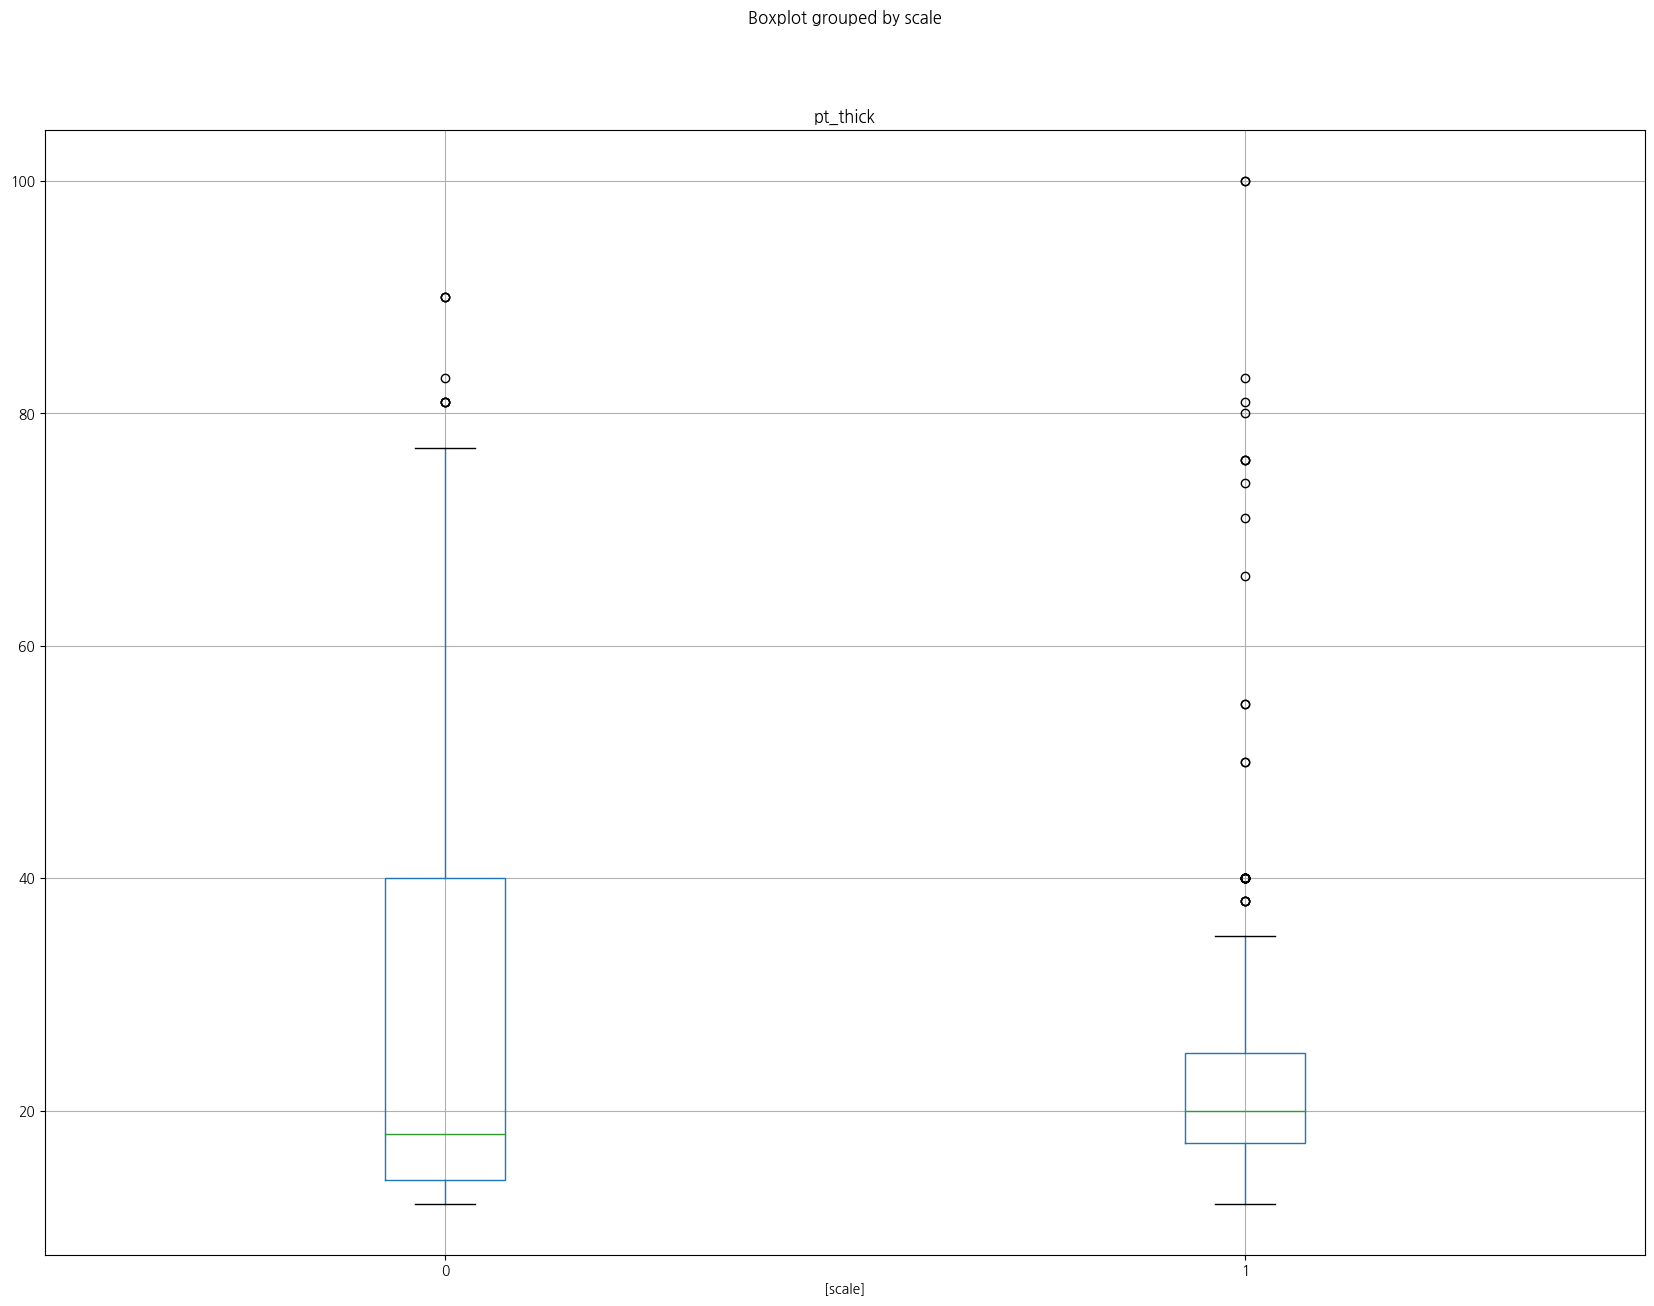

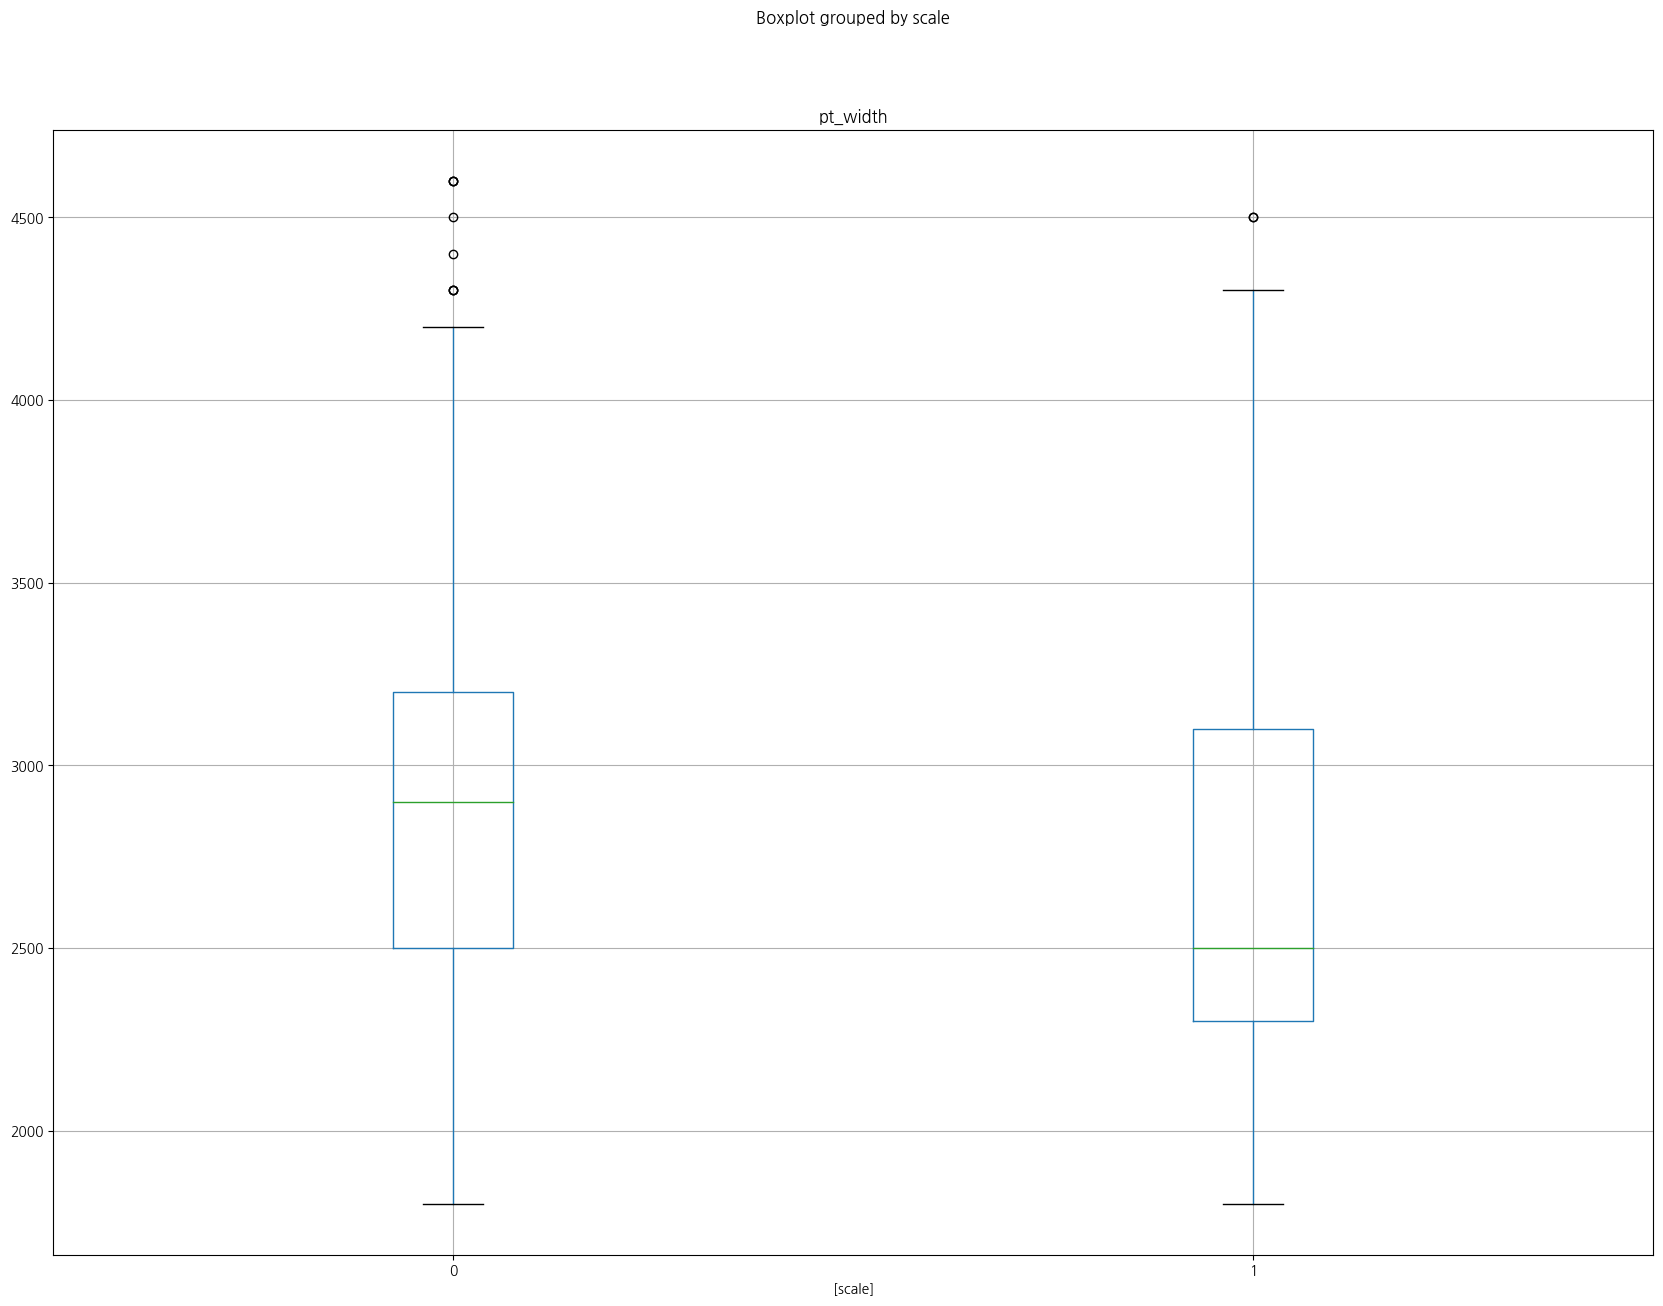

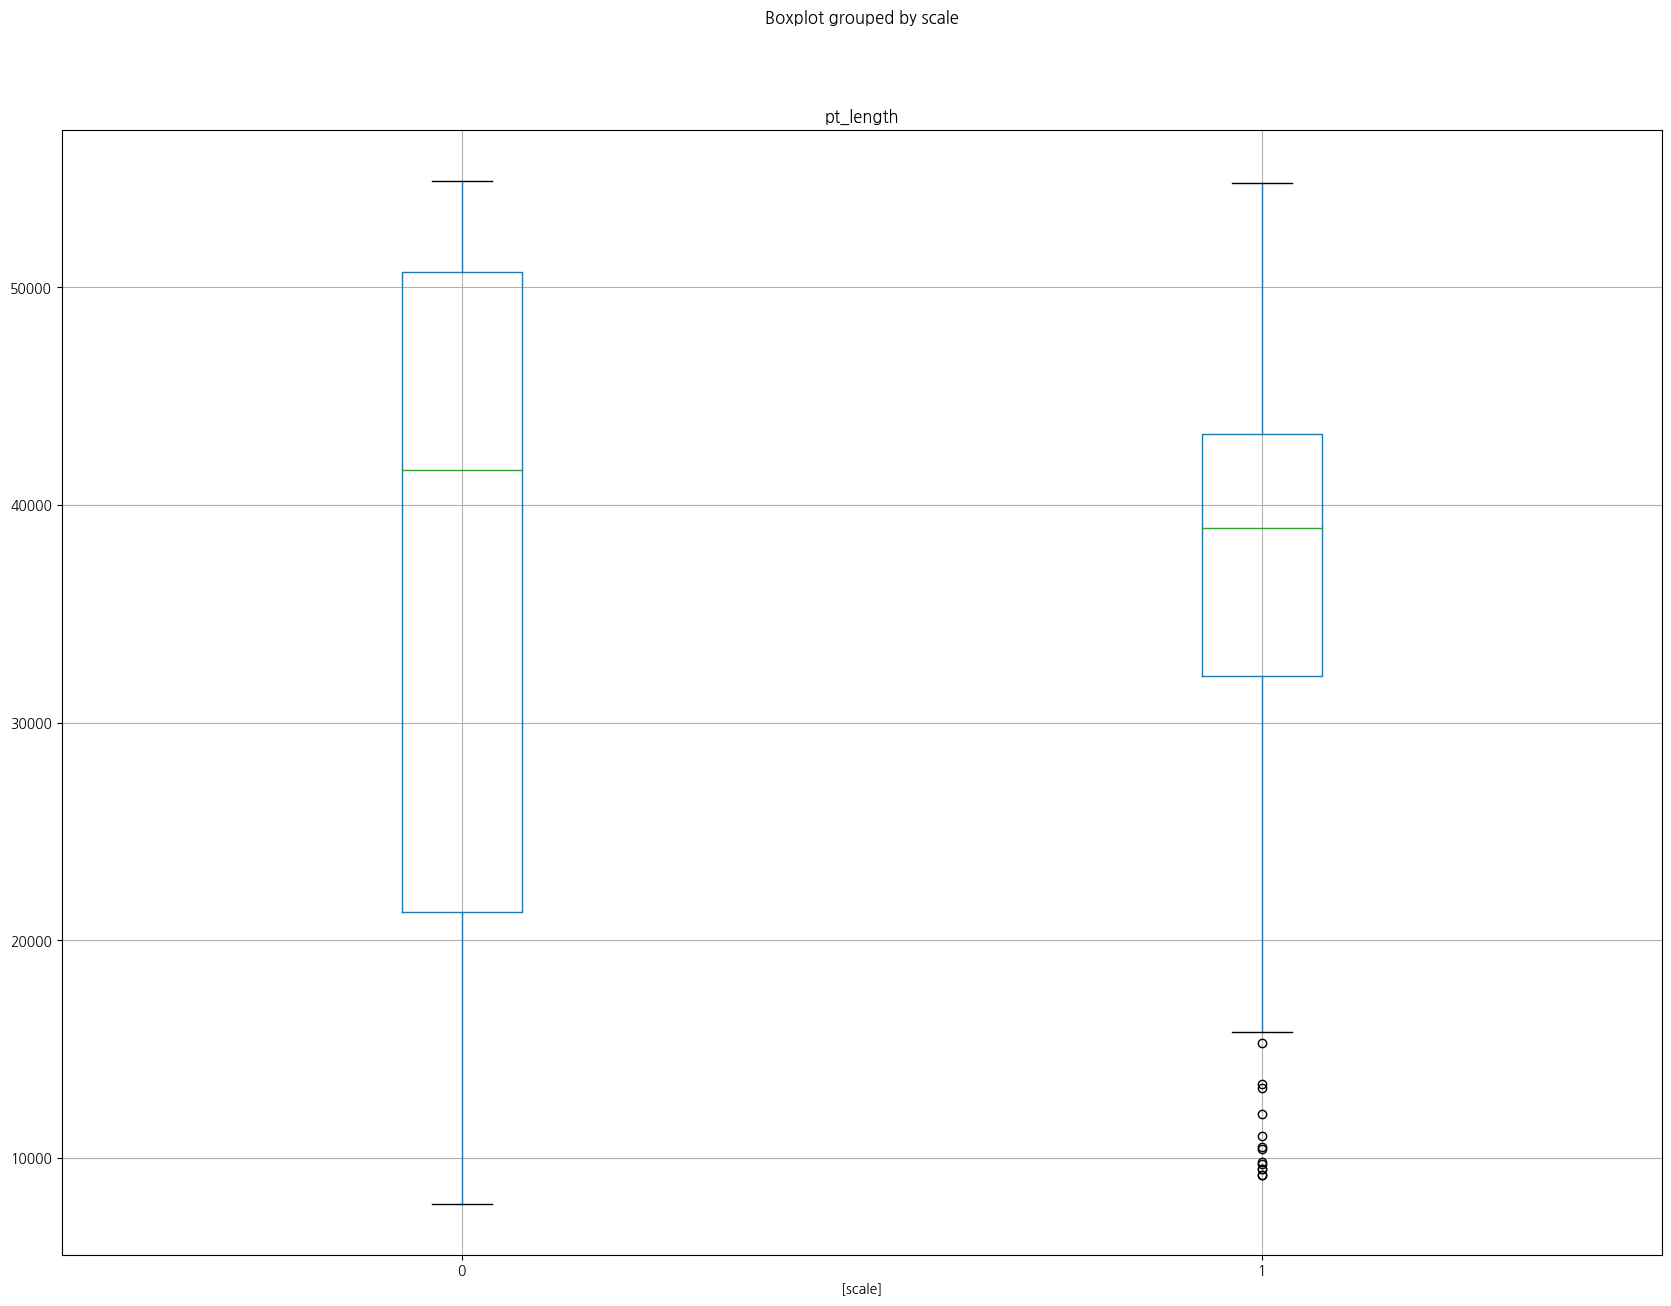

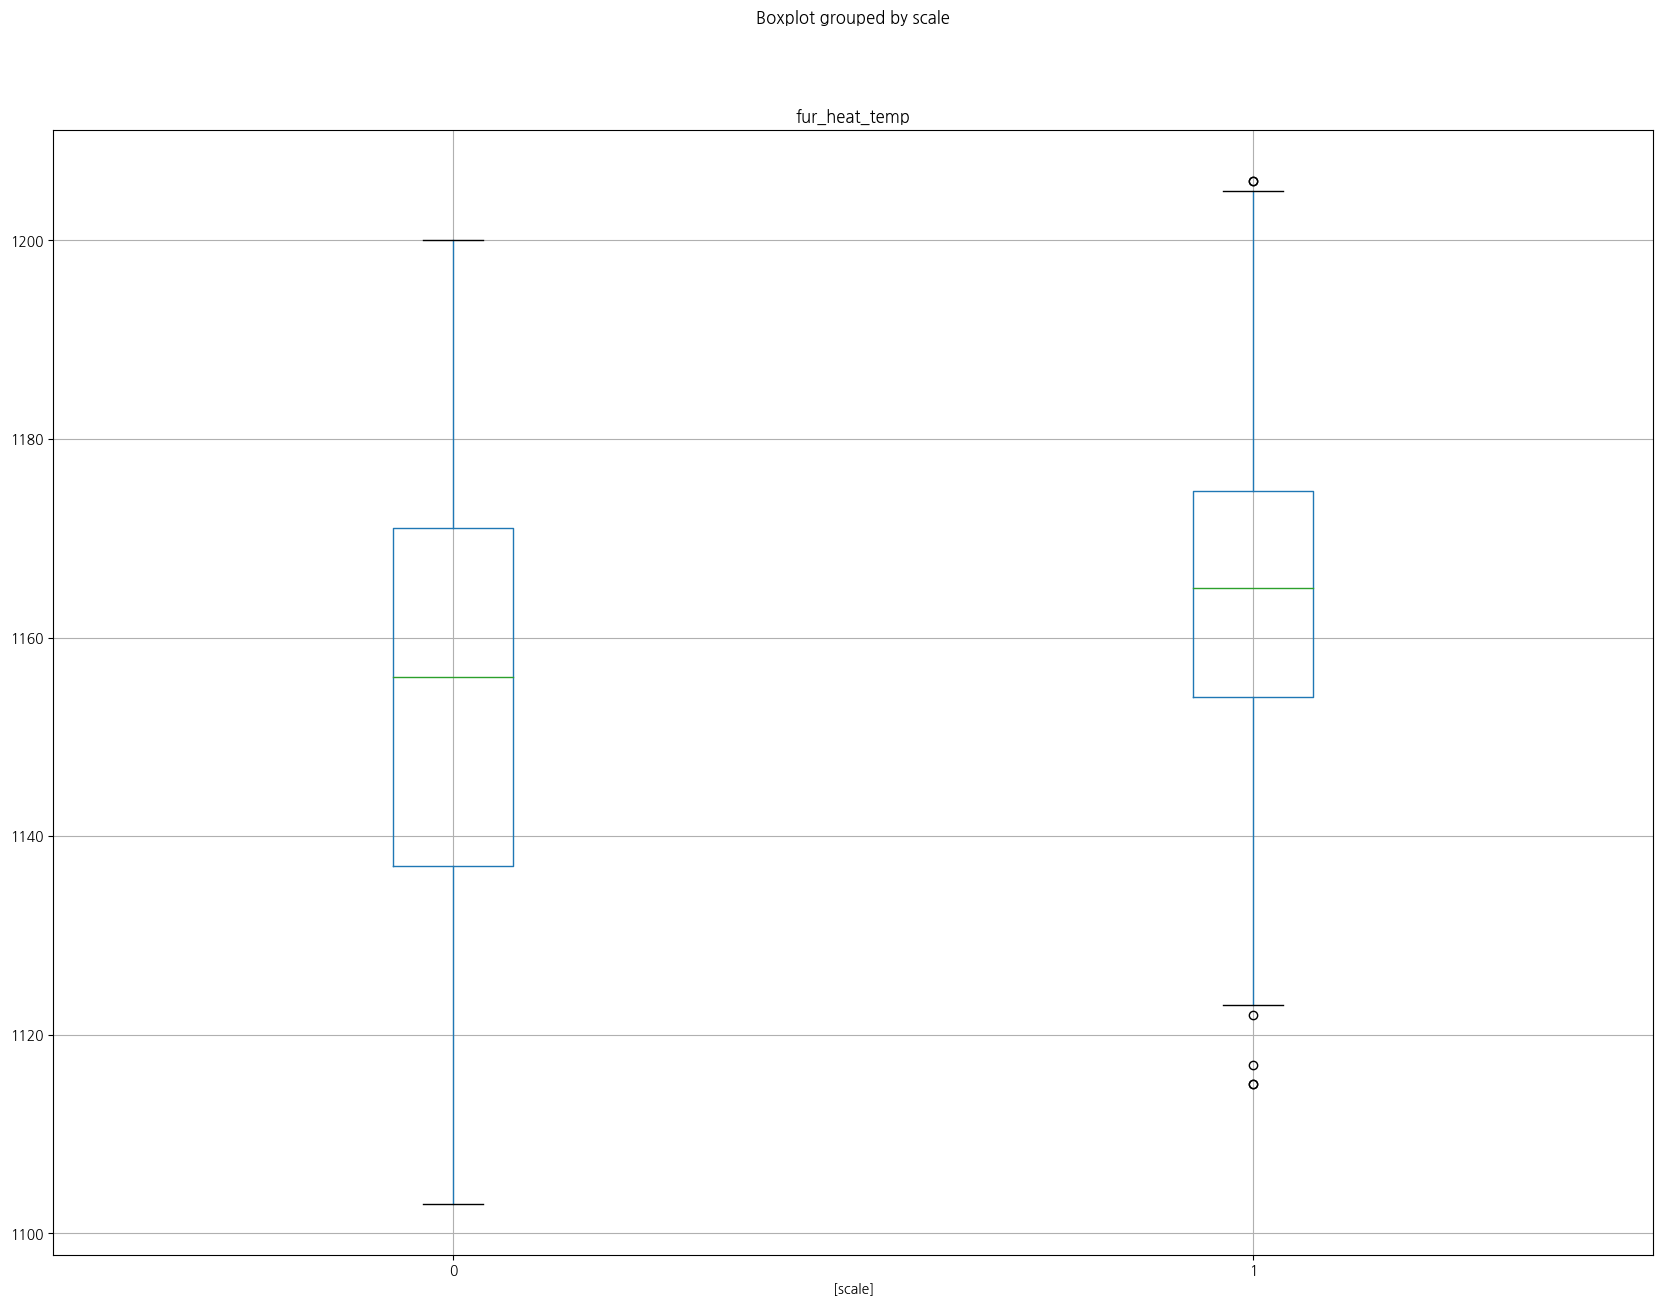

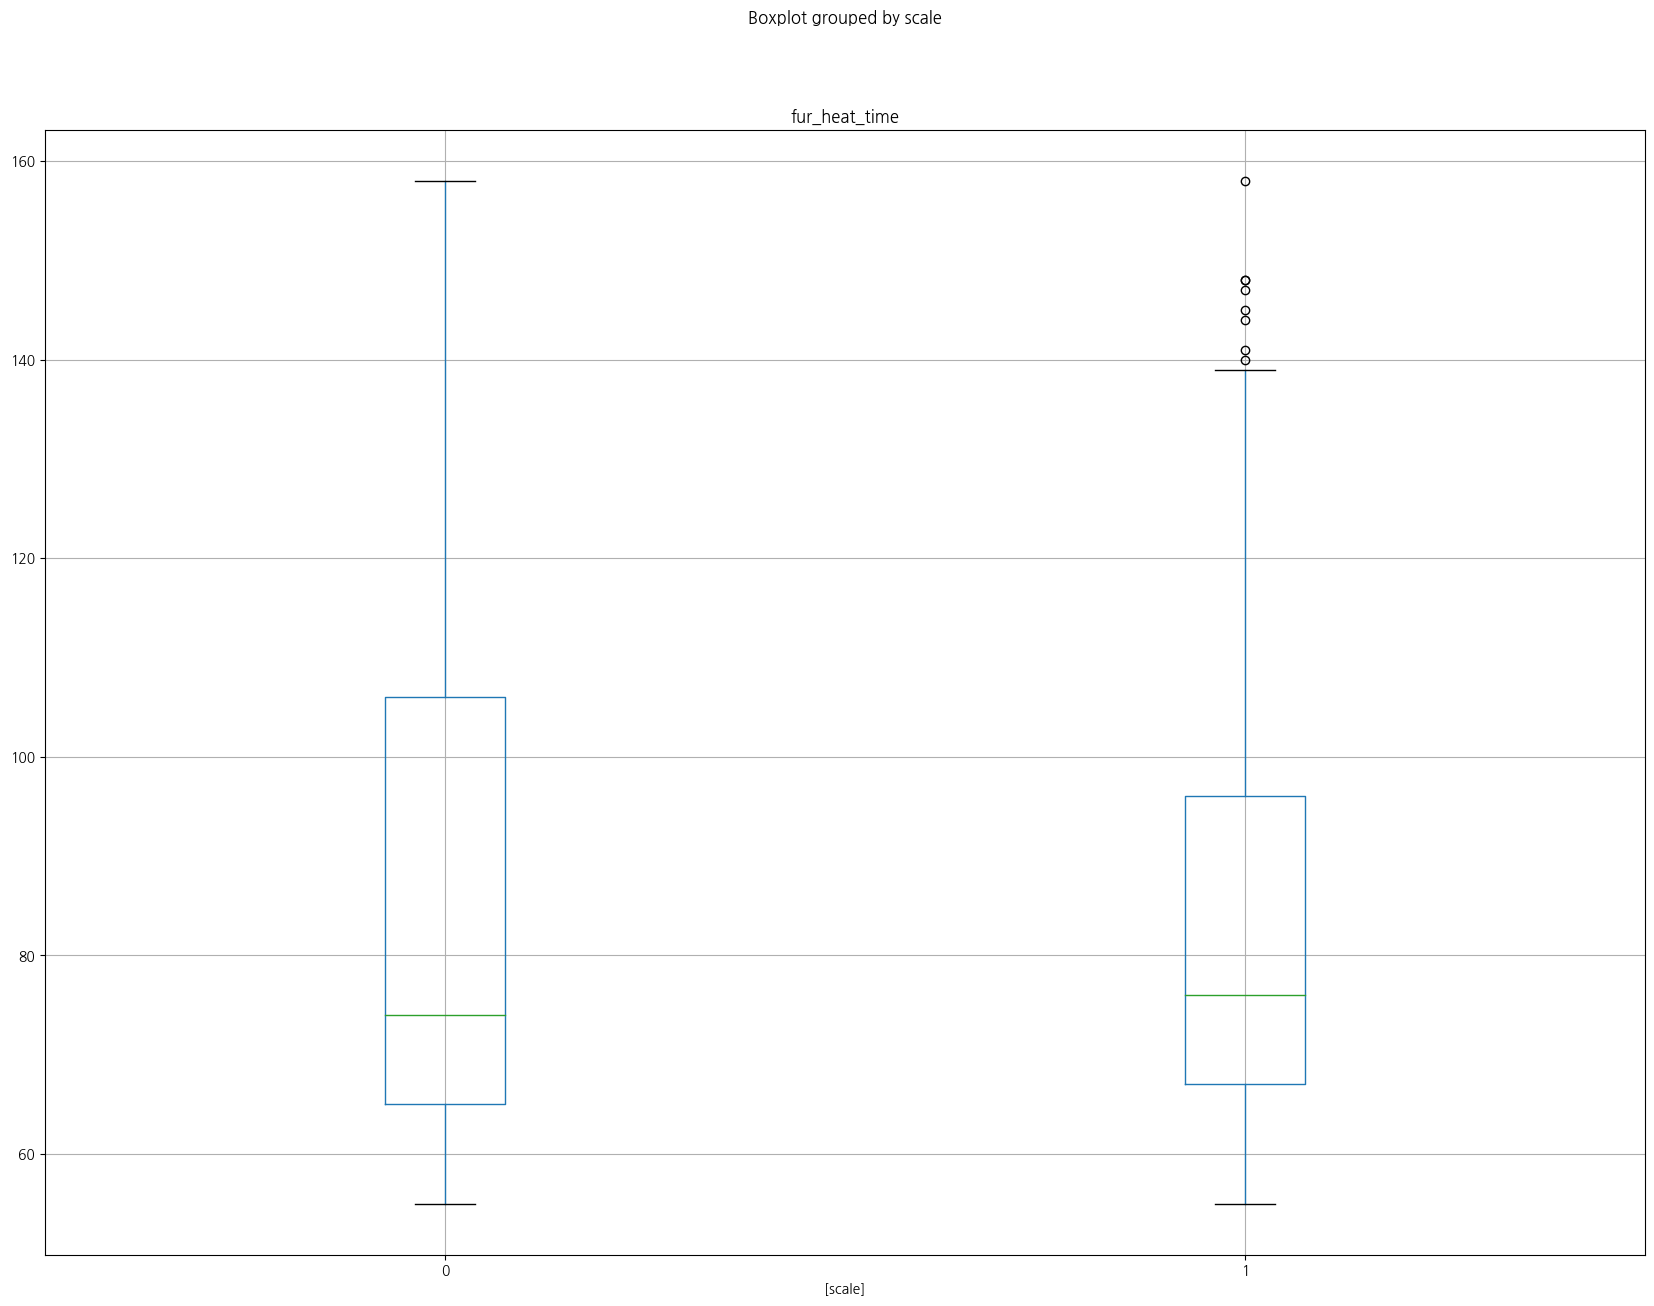

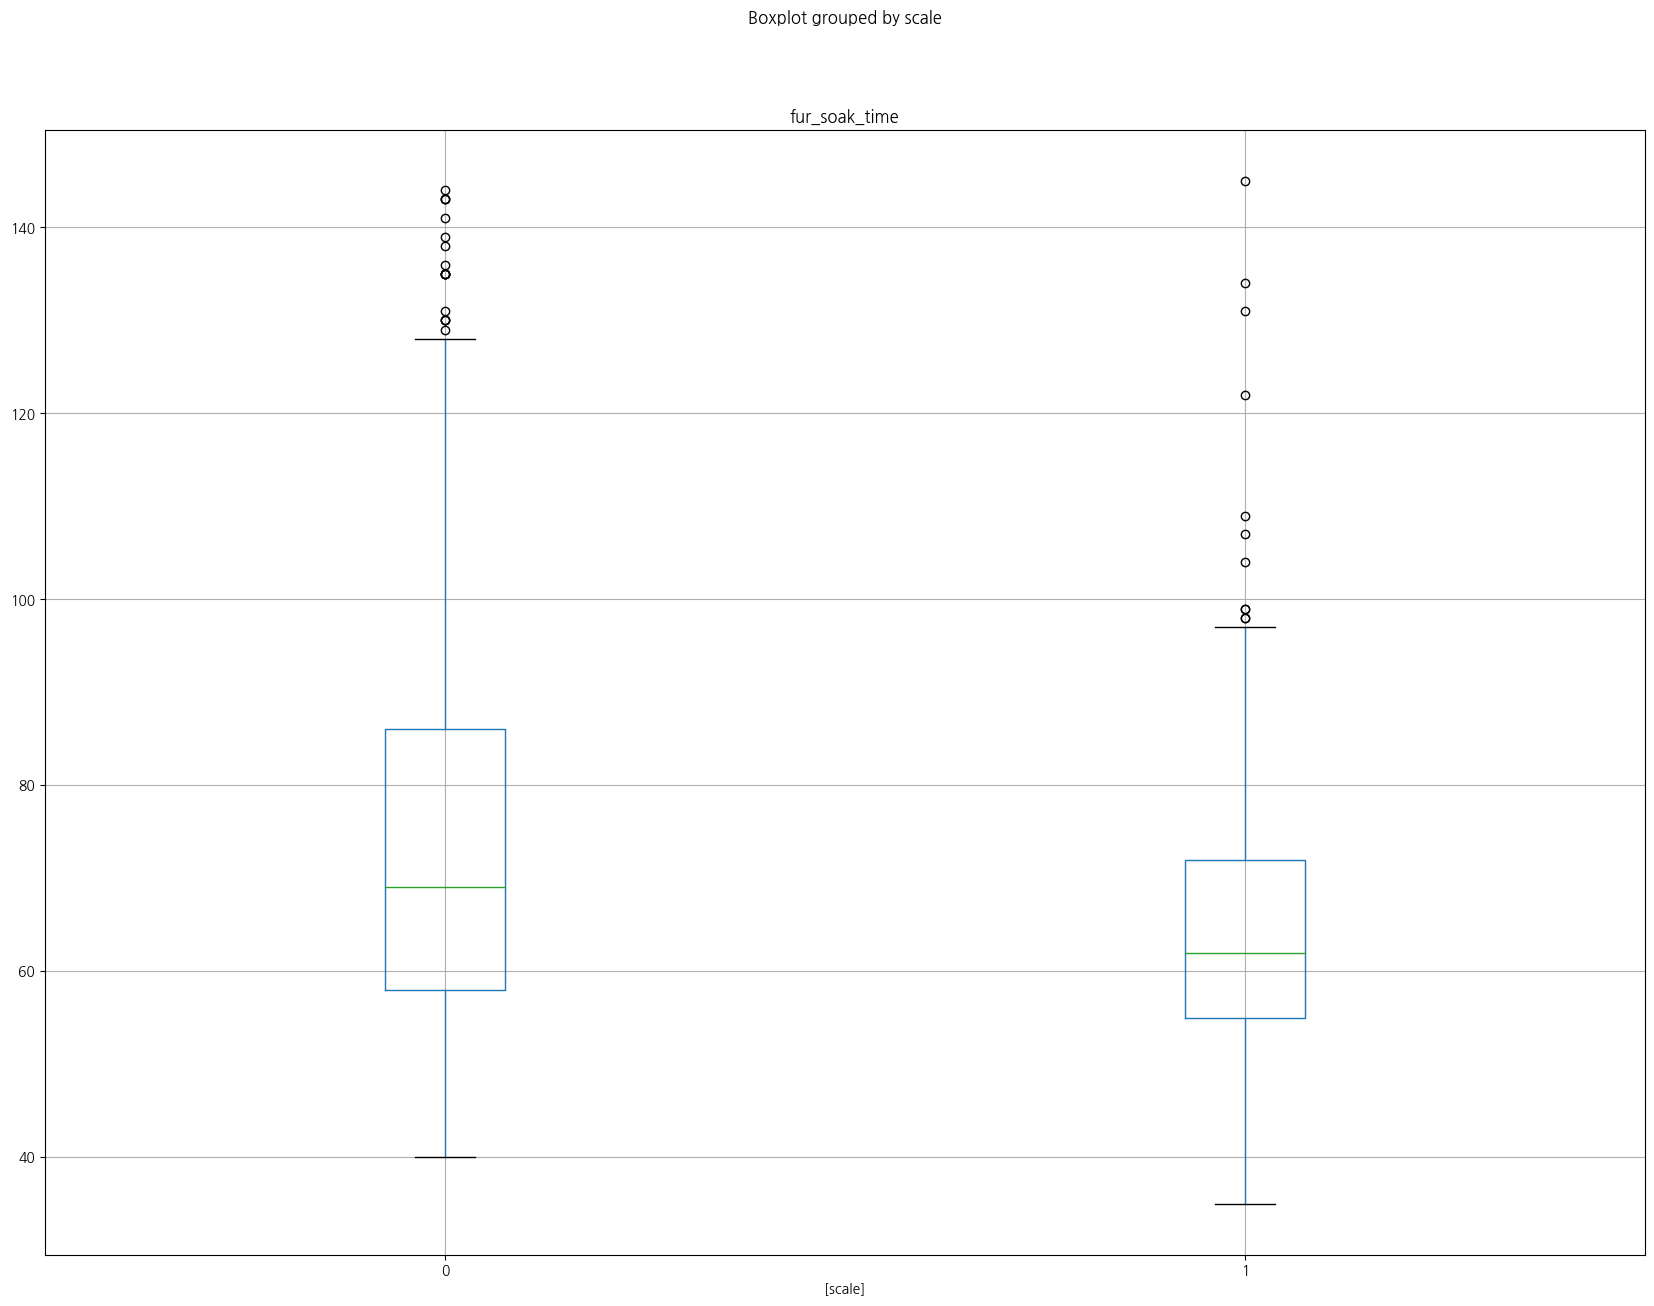

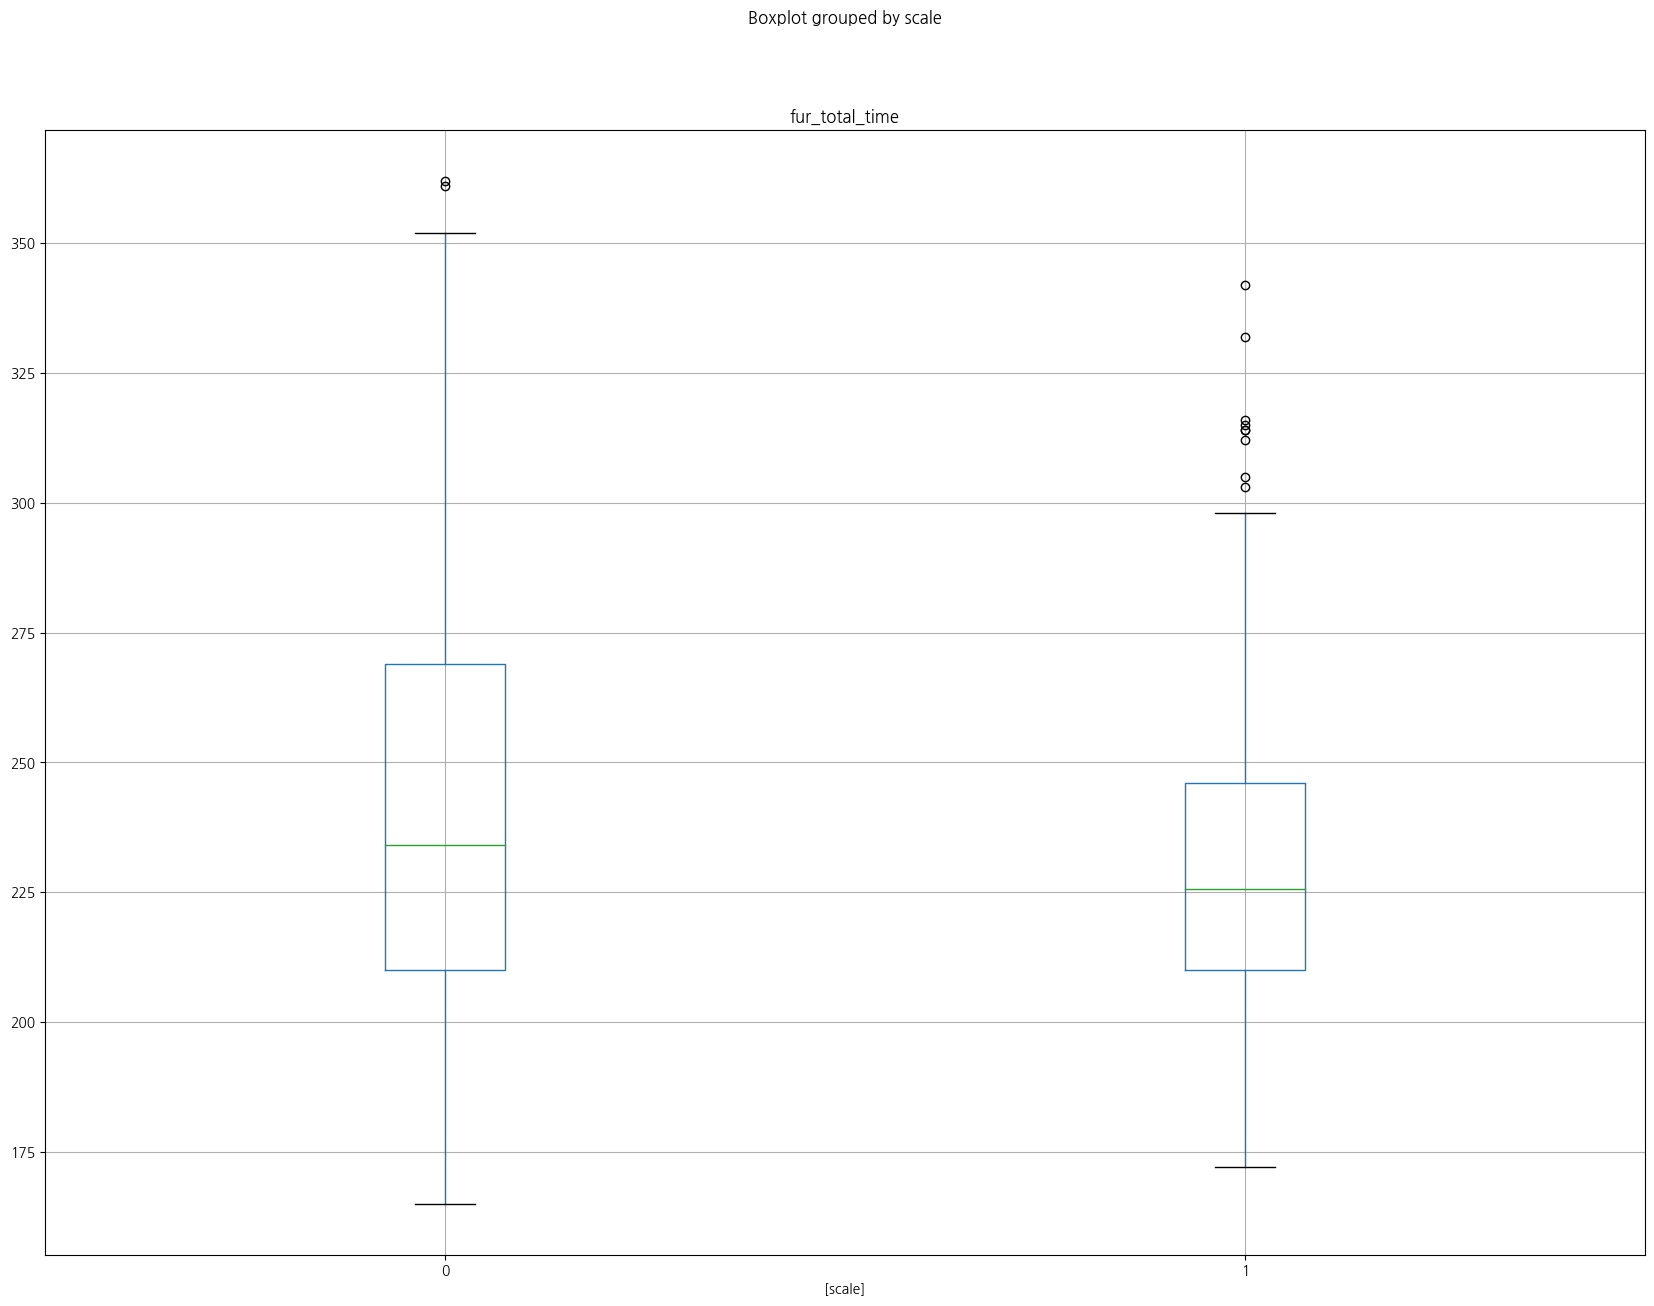

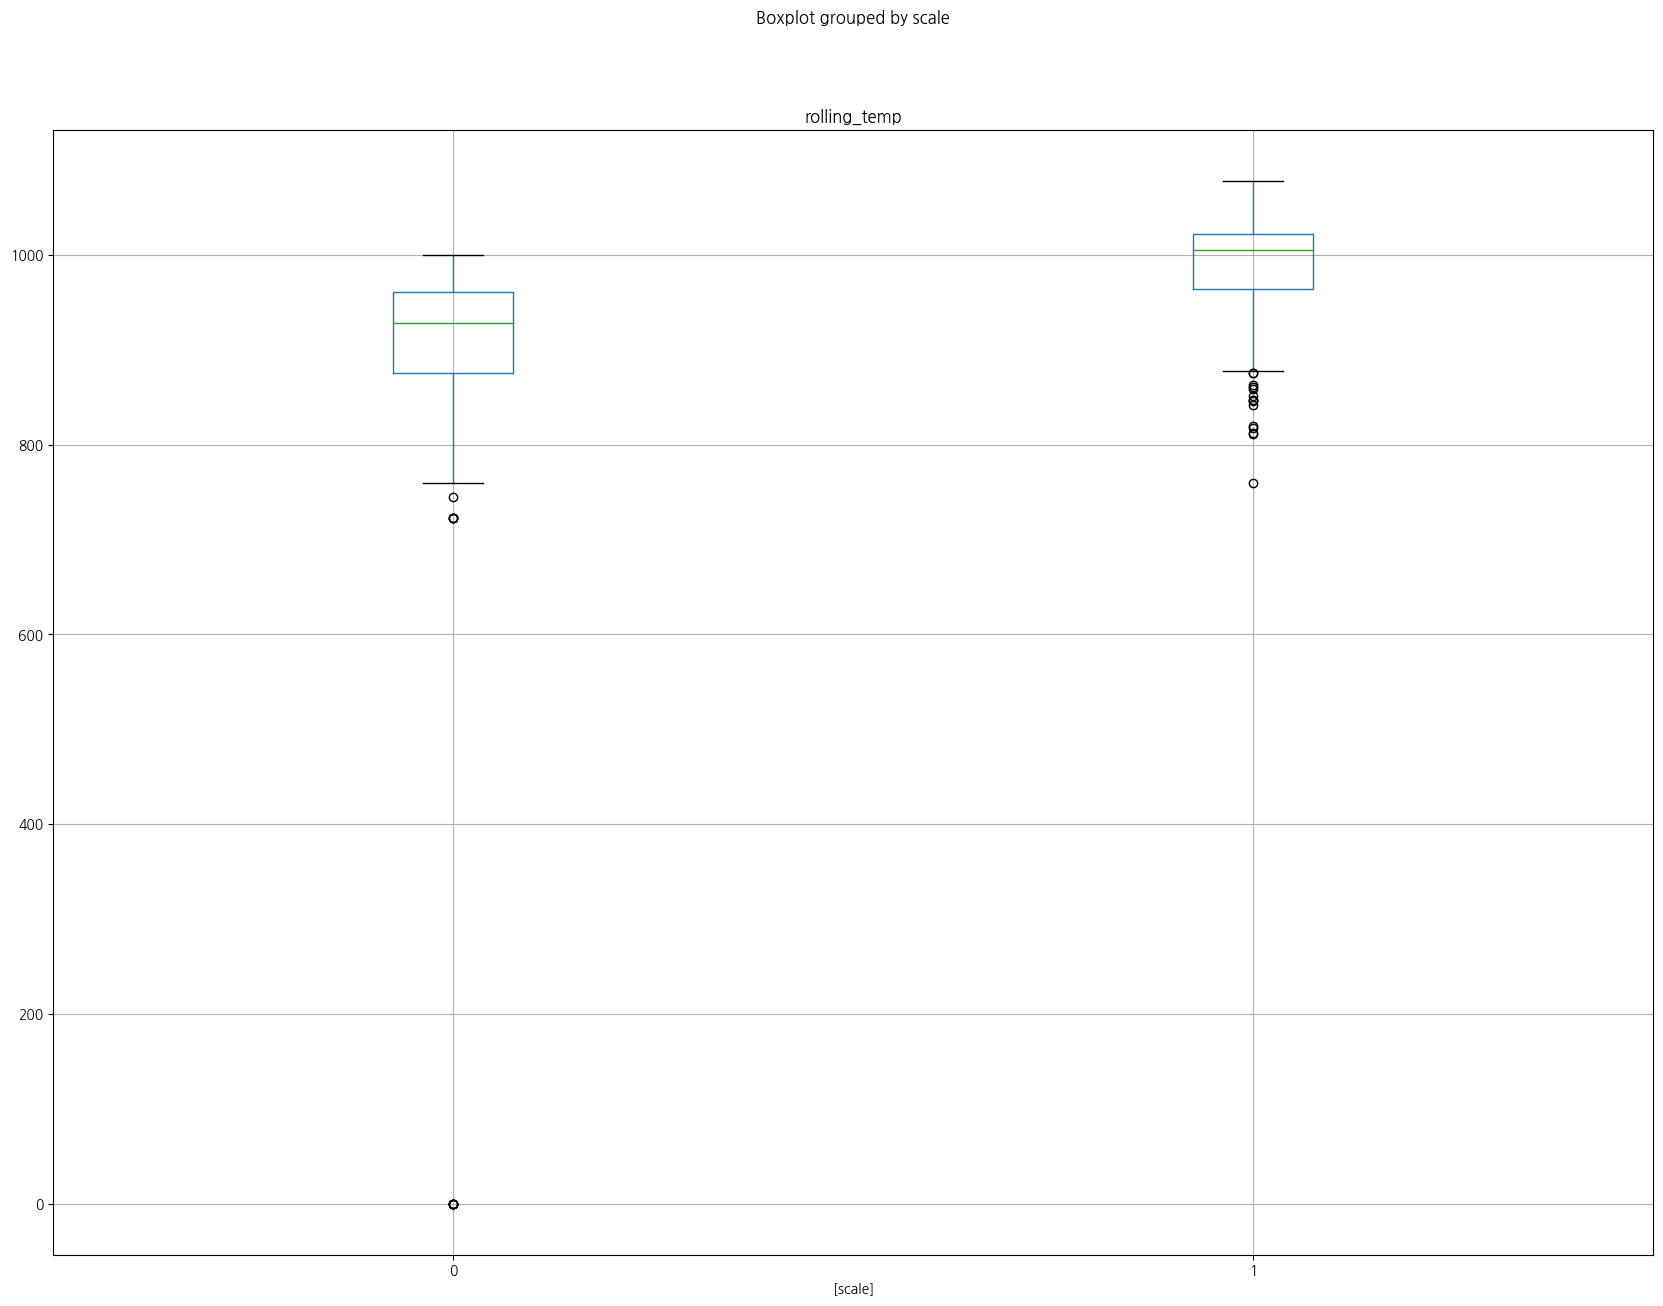

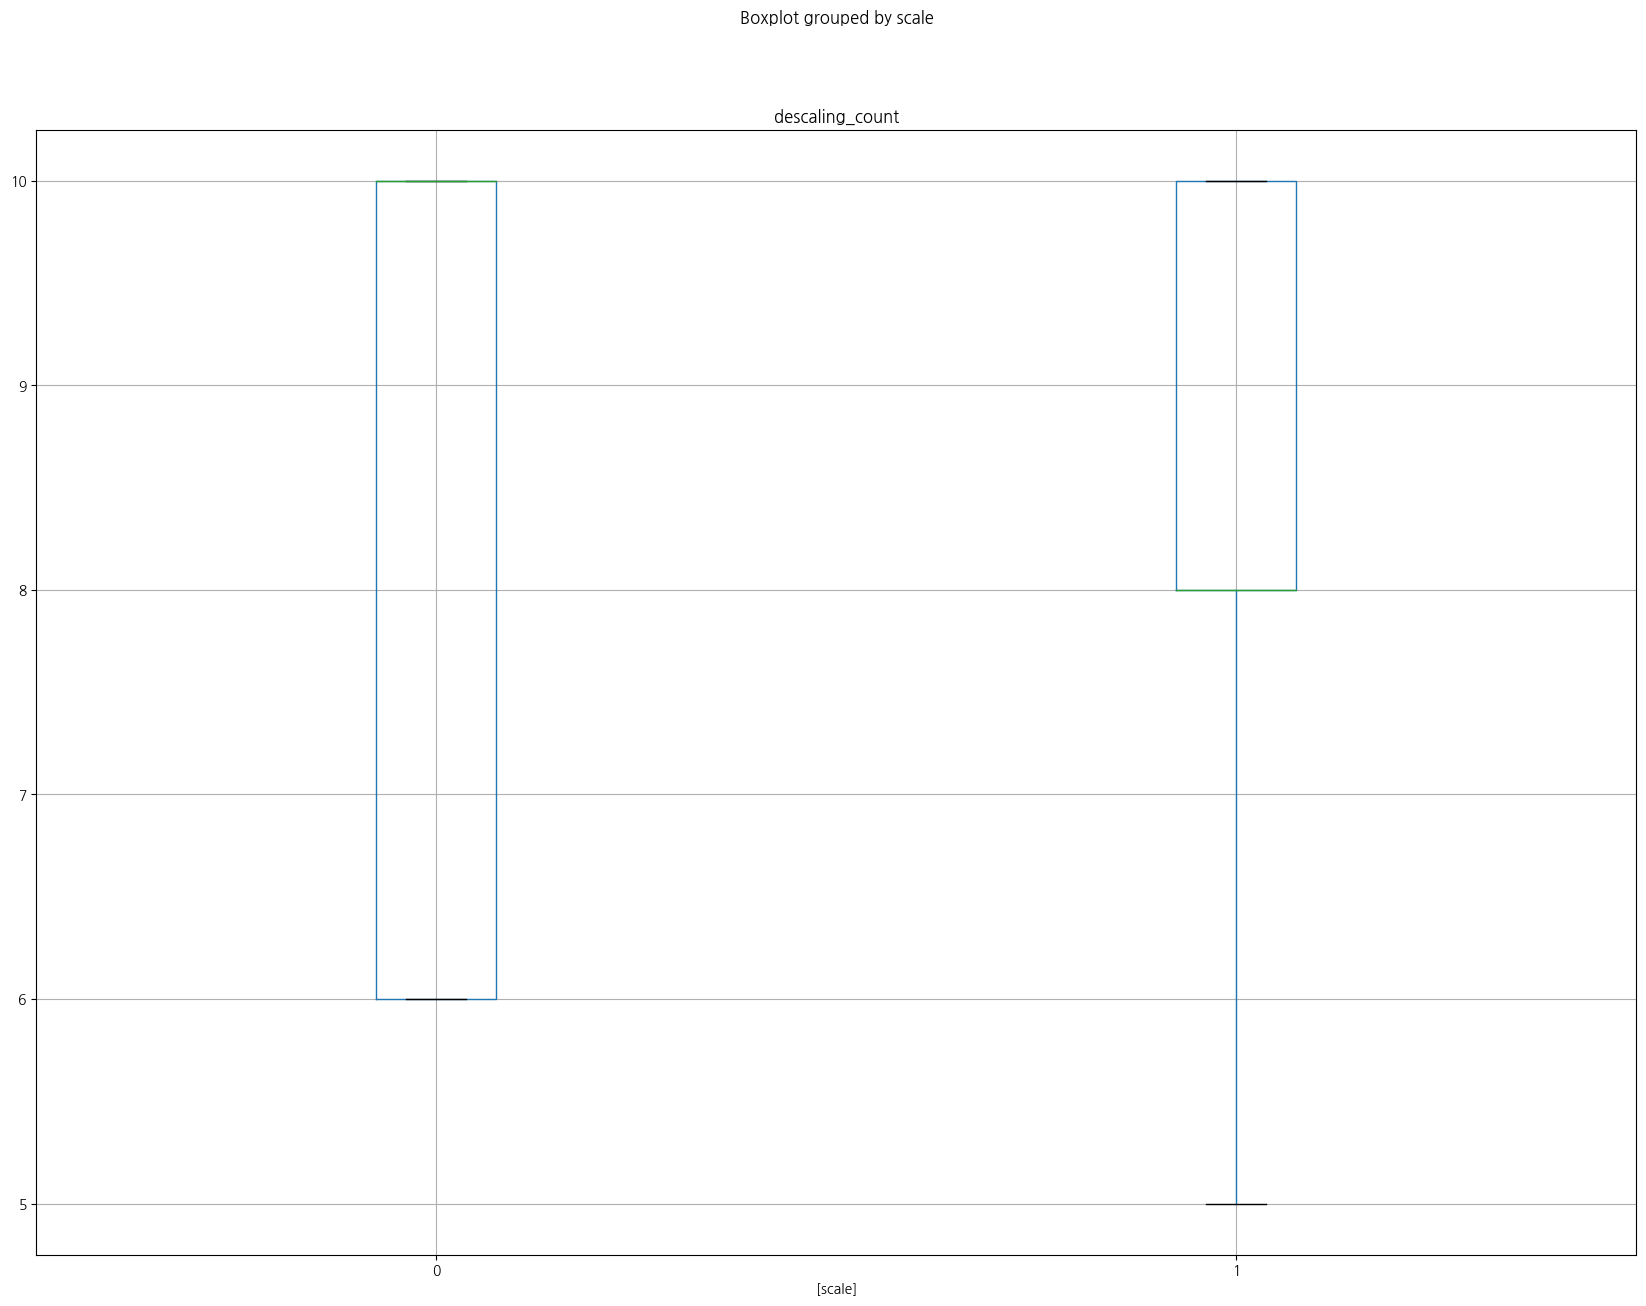

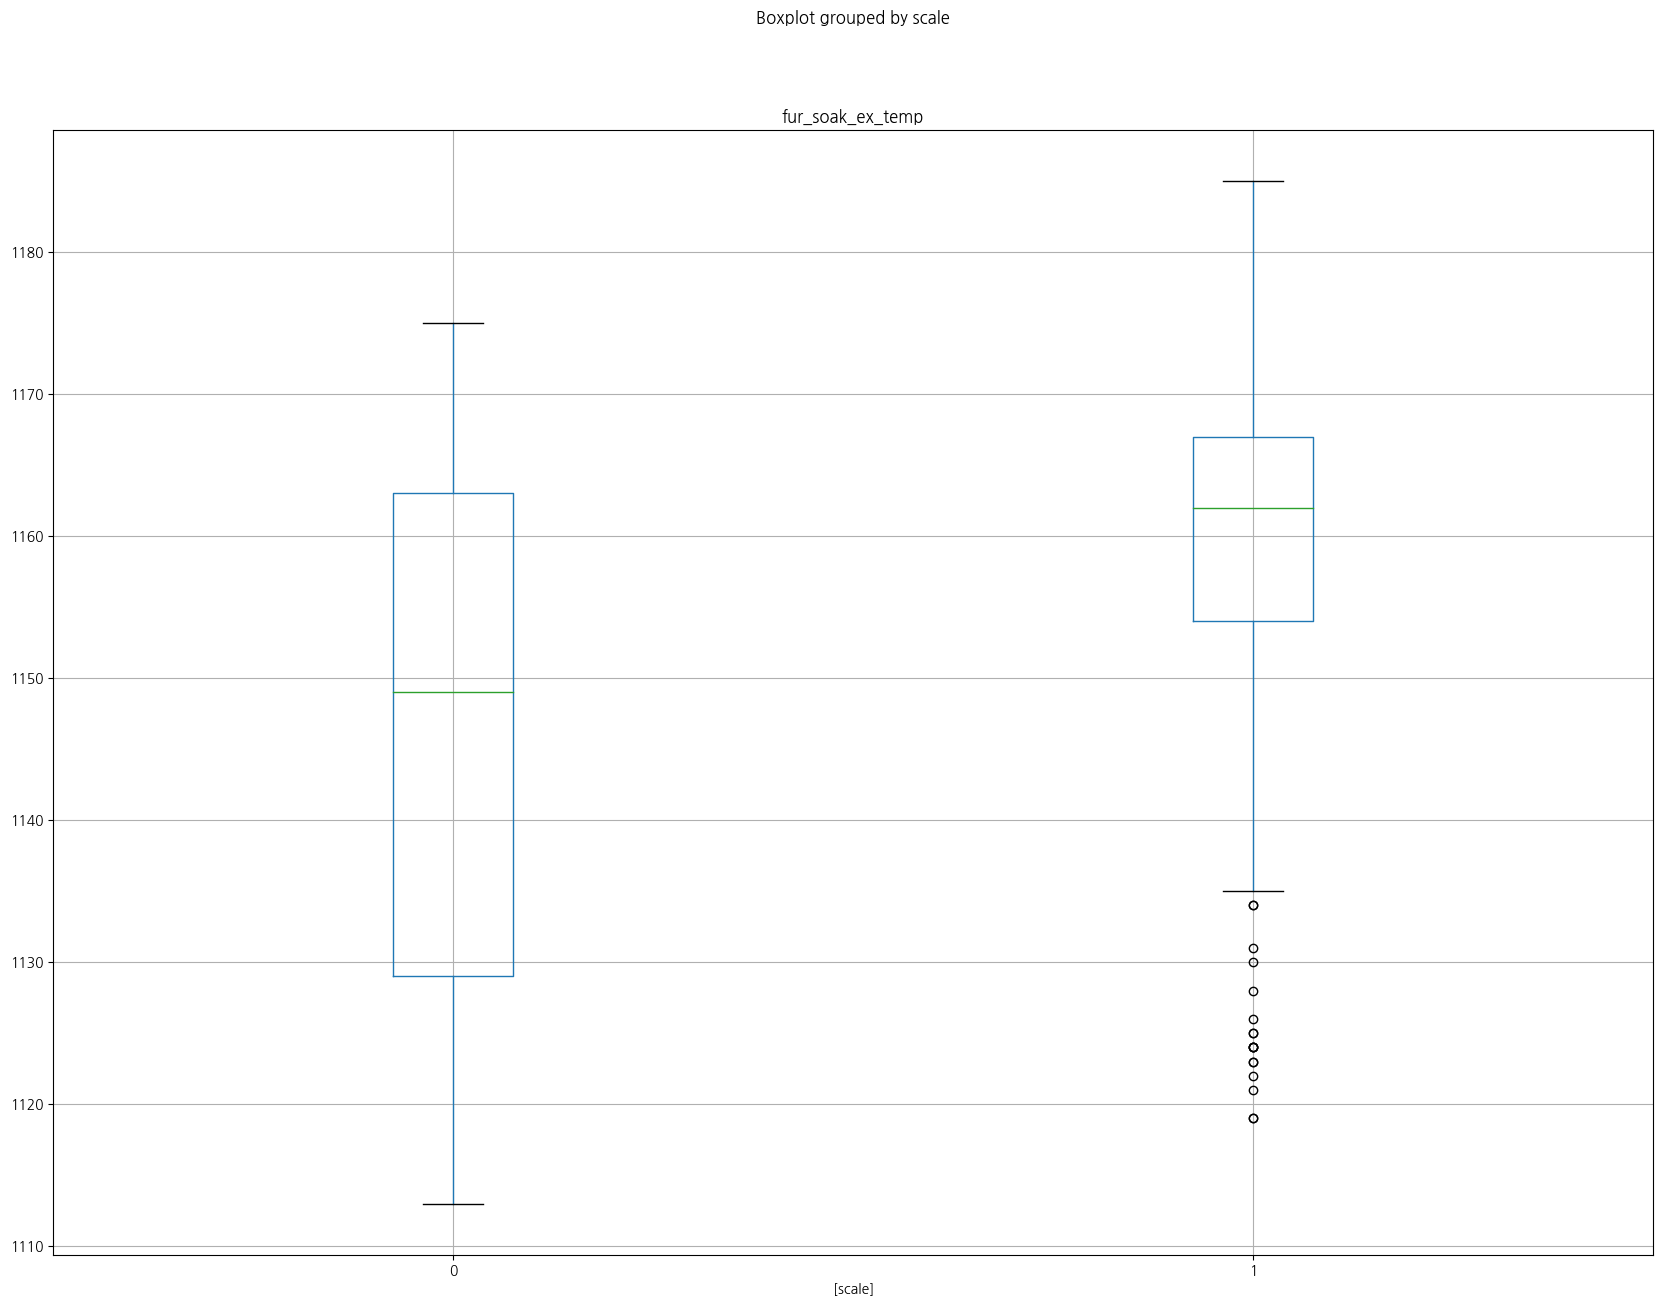

In [61]:
# 연속형 범주에 대해서 box plot 확인
columns = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time',
           'fur_soak_time', 'fur_total_time','rolling_temp', 'descaling_count' ,'fur_soak_ex_temp']

for i, column in enumerate(columns):
    df_raw.boxplot(column = column, by = ['scale'] , figsize=(20, 15) );

In [62]:
# 이상치 제거를 위한 함수 정의 (IQR을 계산하여 이상치 제거) 

def outliers_lower_bound(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return lower_bound

def outliers_upper_bound(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return upper_bound

In [63]:
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,date,spec_classification,fur_soak_ex_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,59,259,TMCP(온도제어),934,8,1조,2023-01-03,선체구조용,1133
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,53,238,TMCP(온도제어),937,8,1조,2023-01-03,선체구조용,1135
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,55,258,TMCP(온도제어),889,8,1조,2023-01-03,선체구조용,1121
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,68,266,TMCP(온도제어),885,8,1조,2023-01-03,선체구조용,1127
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,48,246,TMCP(온도제어),873,8,1조,2023-01-03,선체구조용,1128


upper_bound :  79.0
lower_bound :  -25.0
upper_bound :  36.625
lower_bound :  5.625


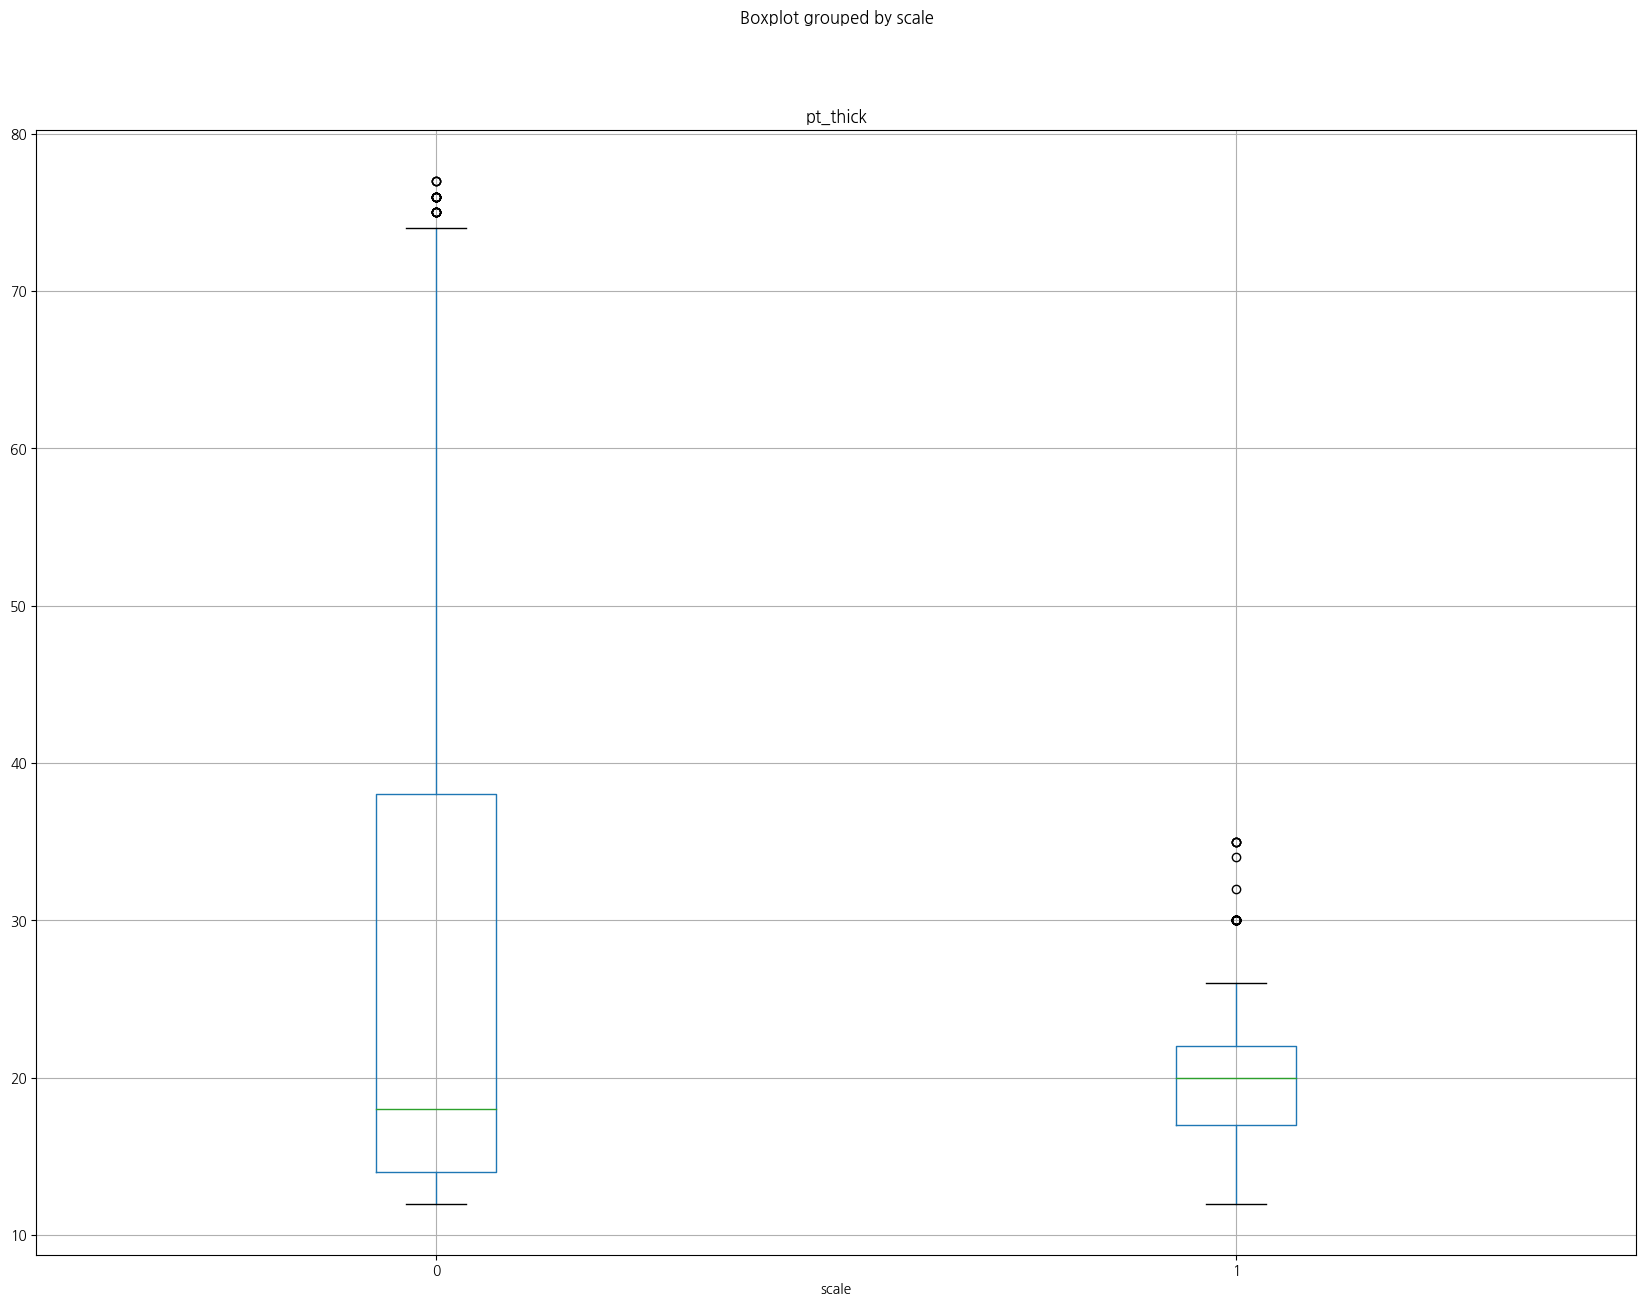

(954, 20)
upper_bound :  4250.0
lower_bound :  1450.0
upper_bound :  4300.0
lower_bound :  1100.0


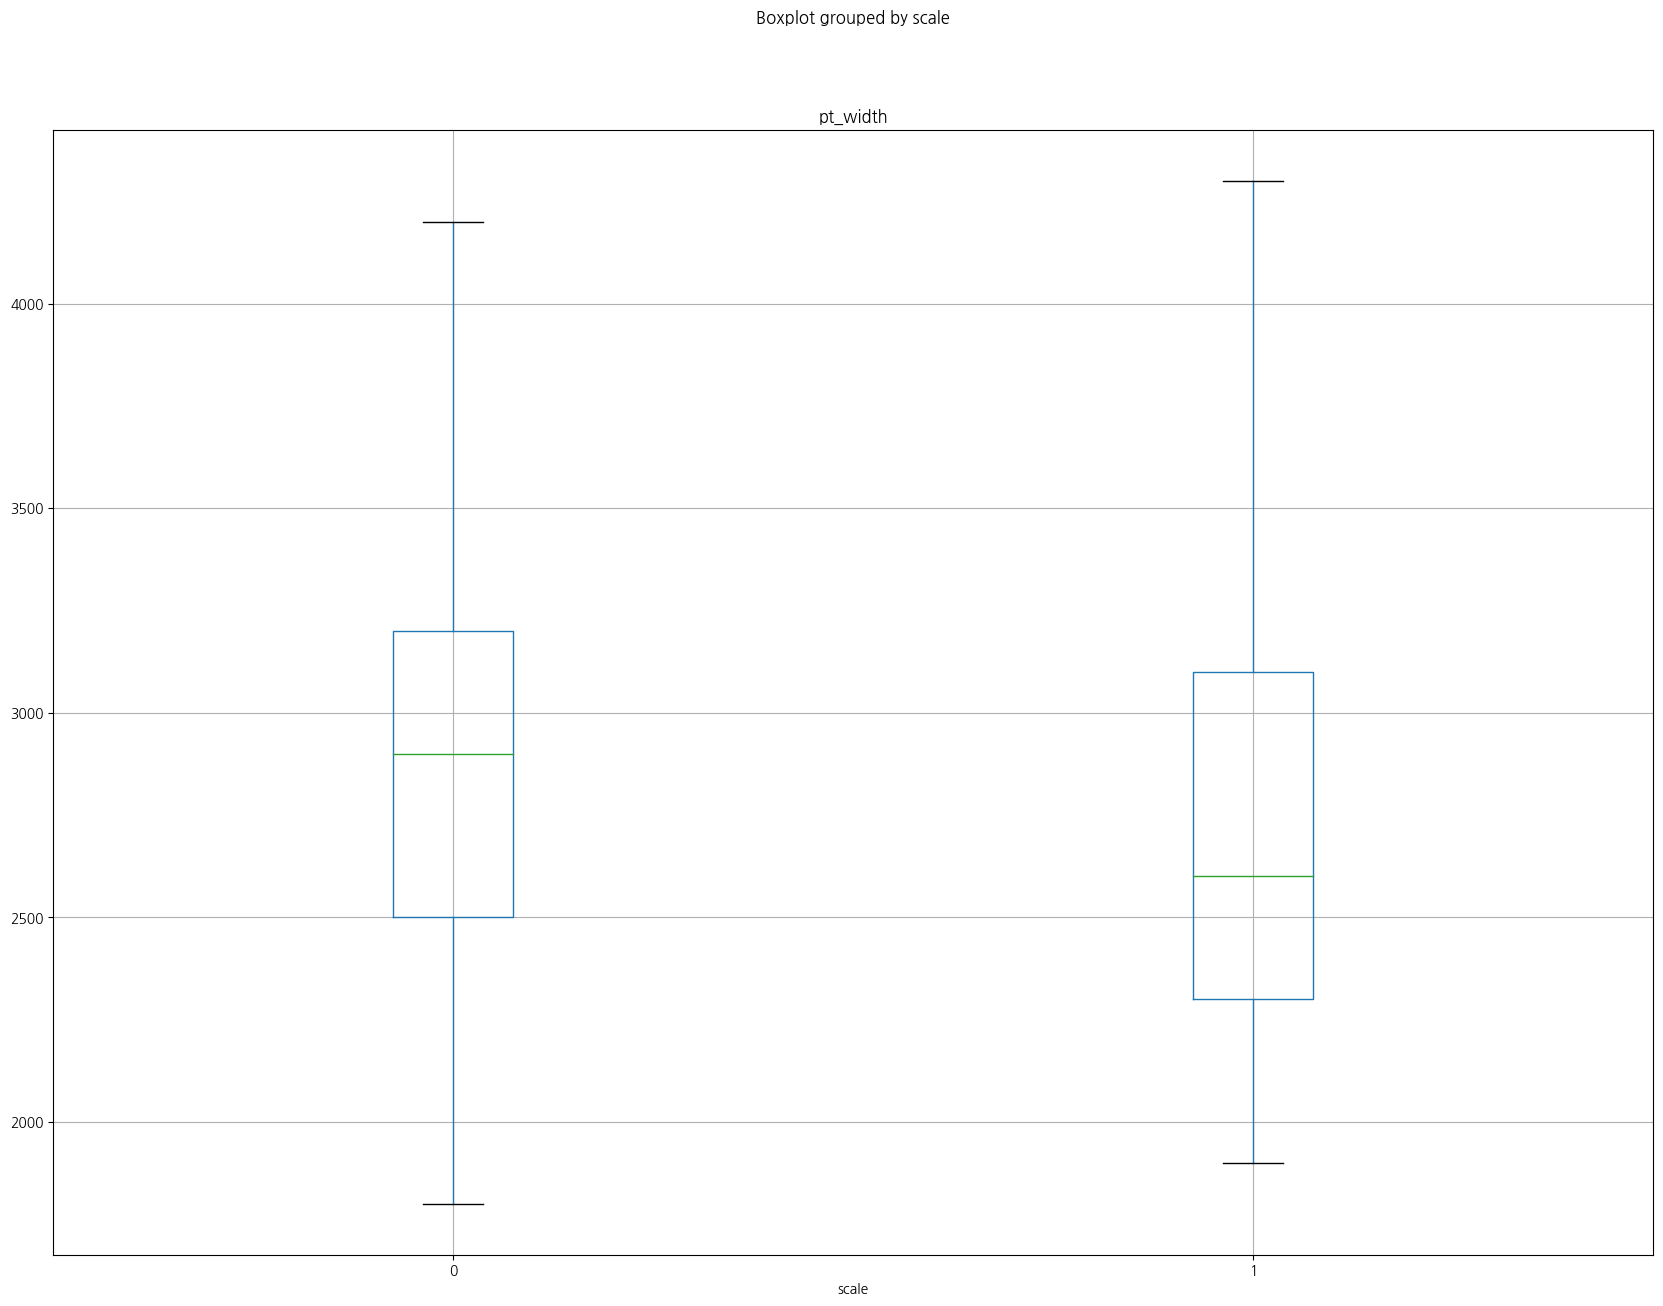

(944, 20)
upper_bound :  94337.5
lower_bound :  -20962.5
upper_bound :  55662.5
lower_bound :  23762.5


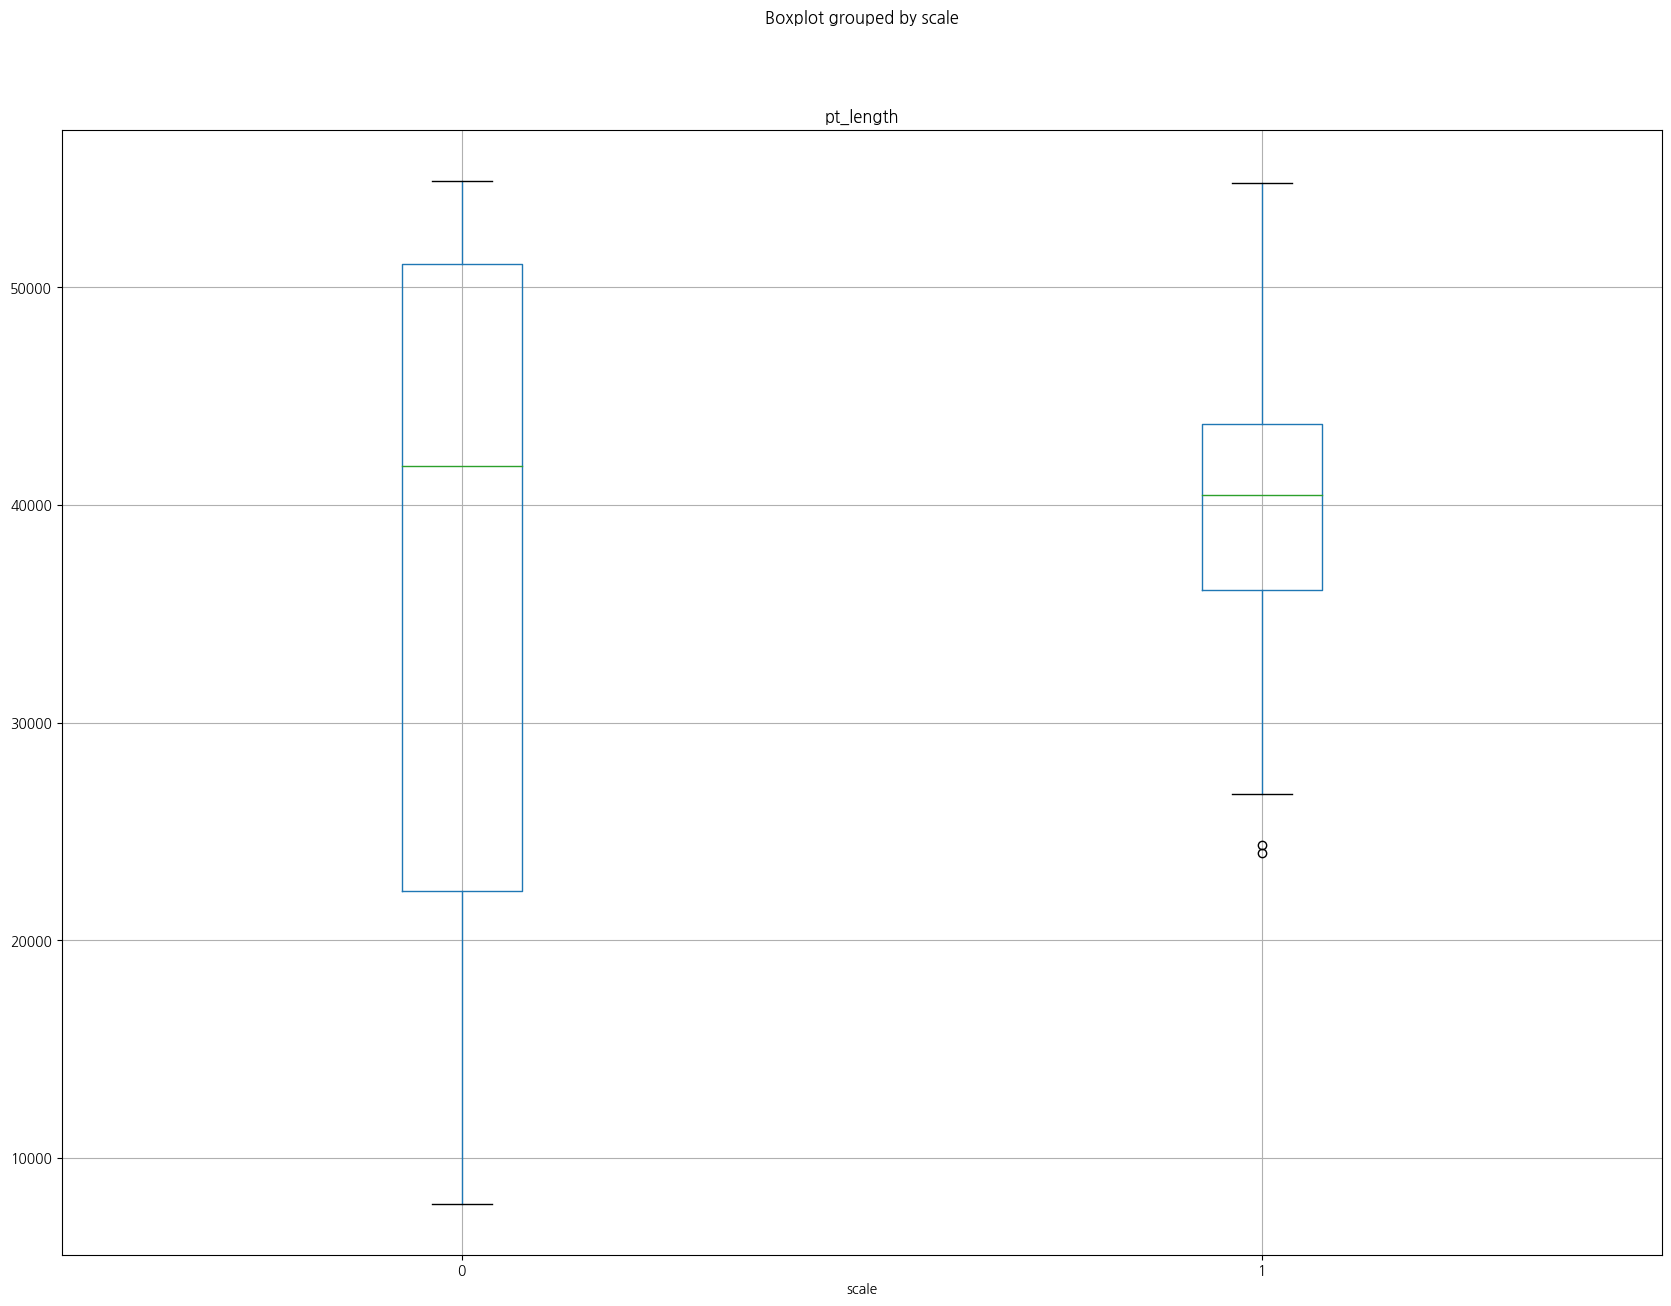

(942, 20)
upper_bound :  1224.5
lower_bound :  1084.5
upper_bound :  1207.0
lower_bound :  1127.0


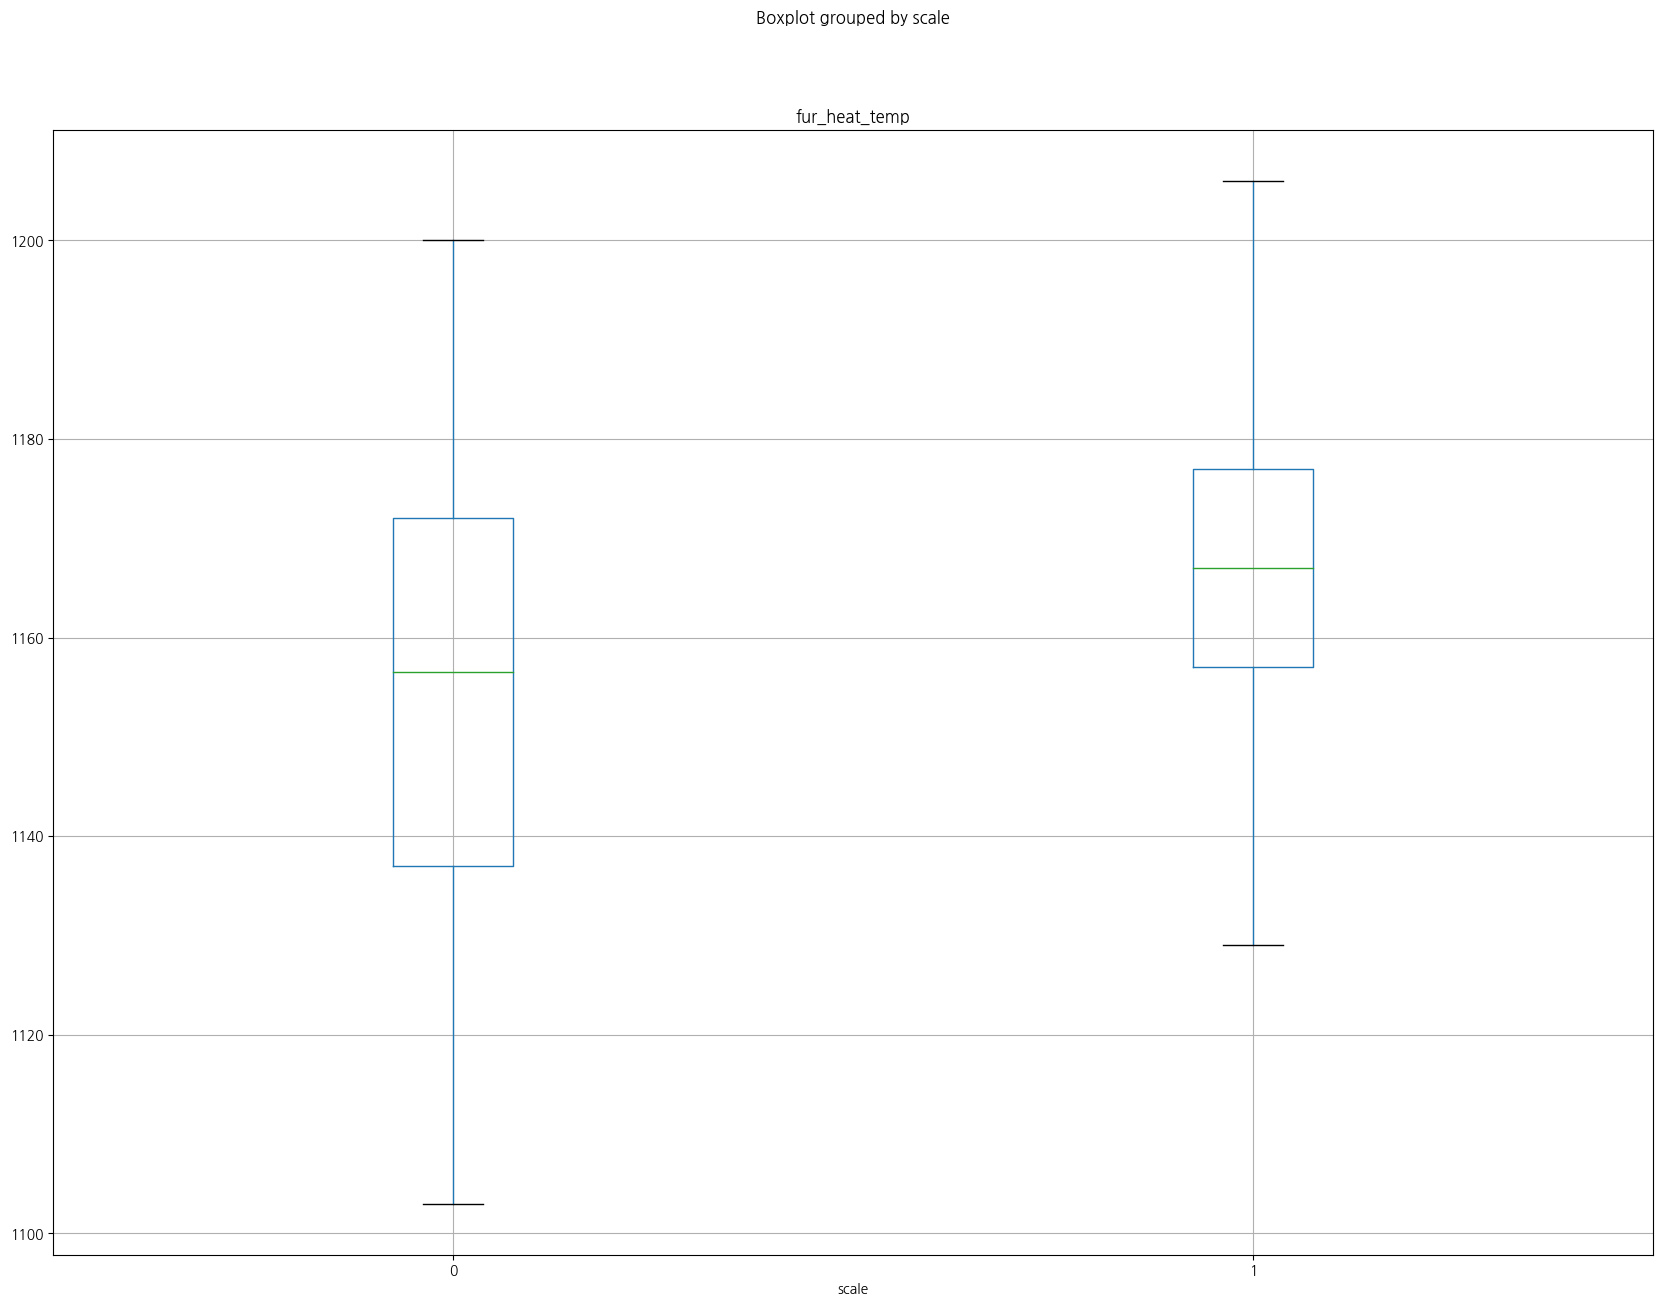

(938, 20)
upper_bound :  167.5
lower_bound :  3.5
upper_bound :  134.125
lower_bound :  25.125


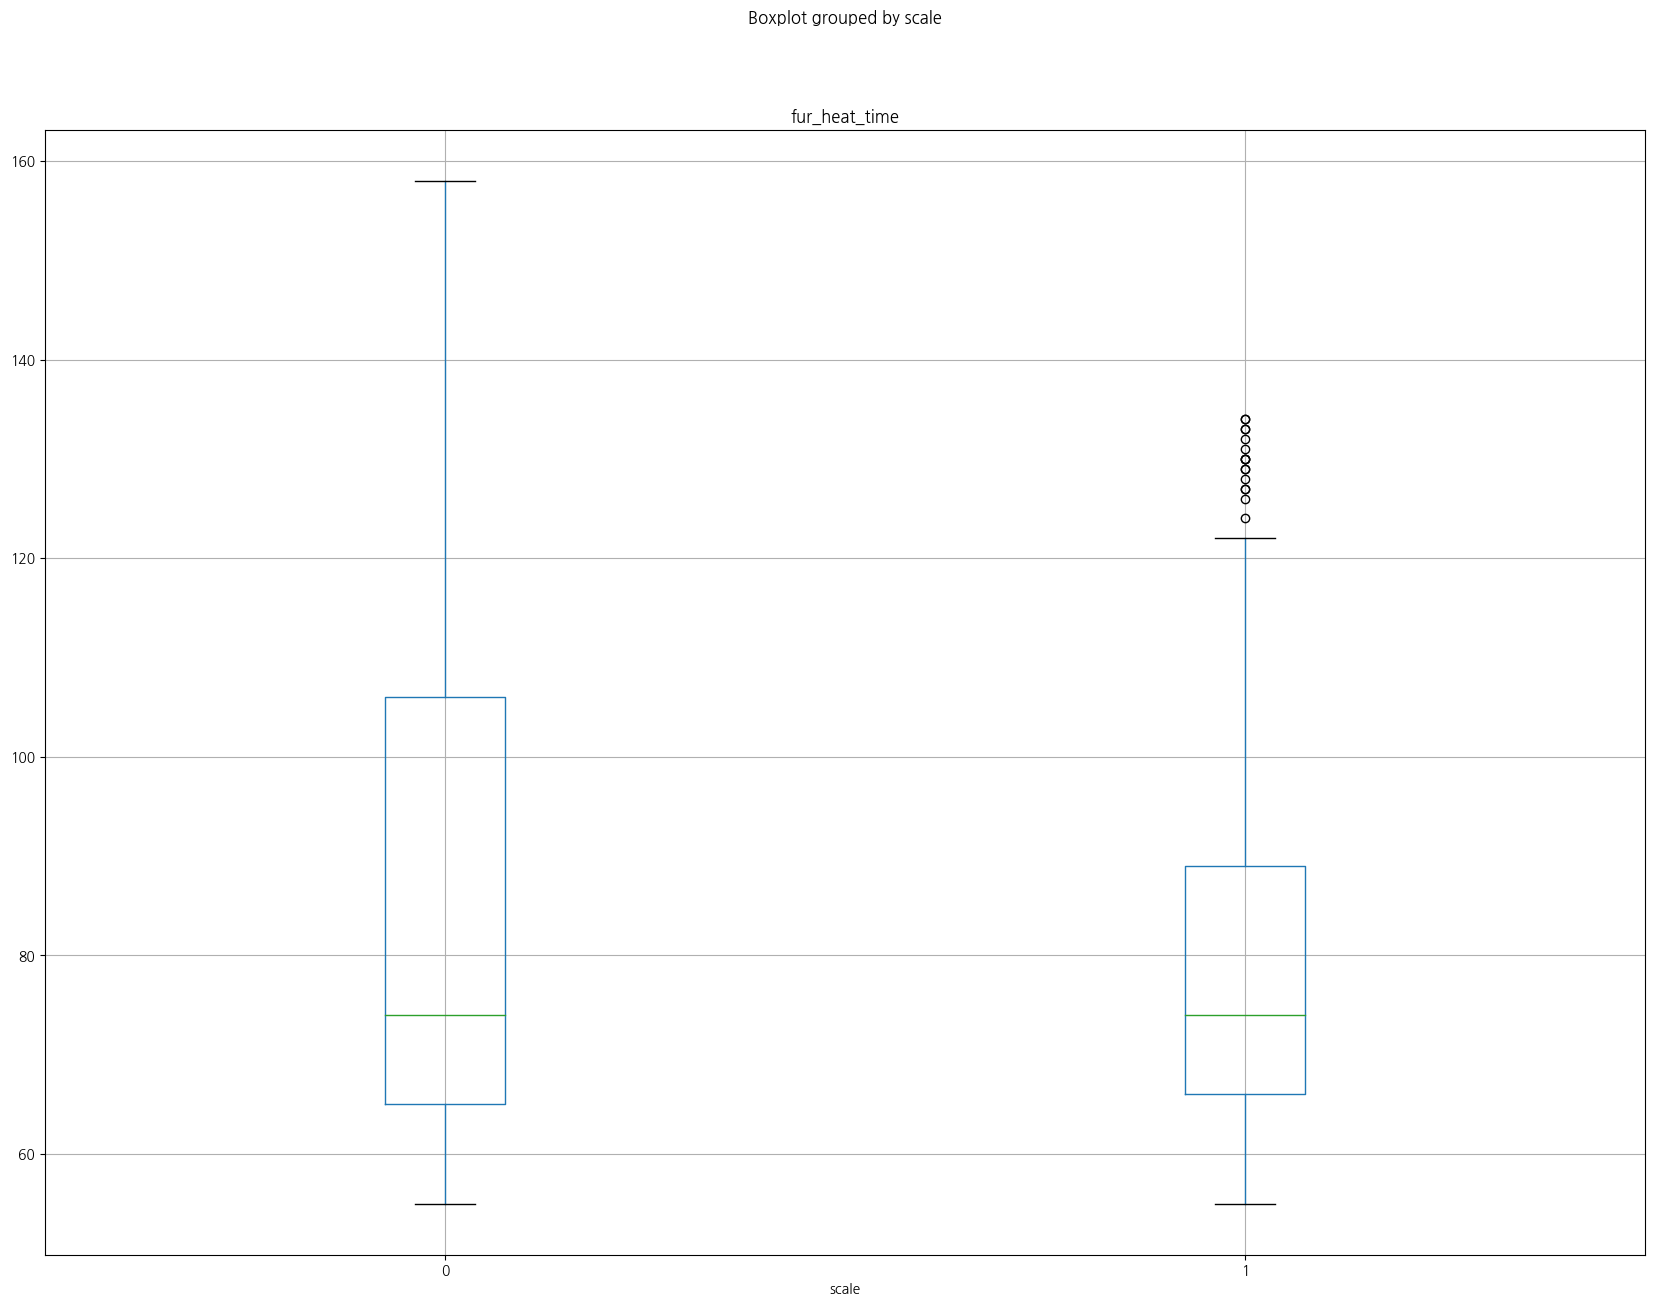

(925, 20)
upper_bound :  128.0
lower_bound :  16.0
upper_bound :  91.5
lower_bound :  31.5


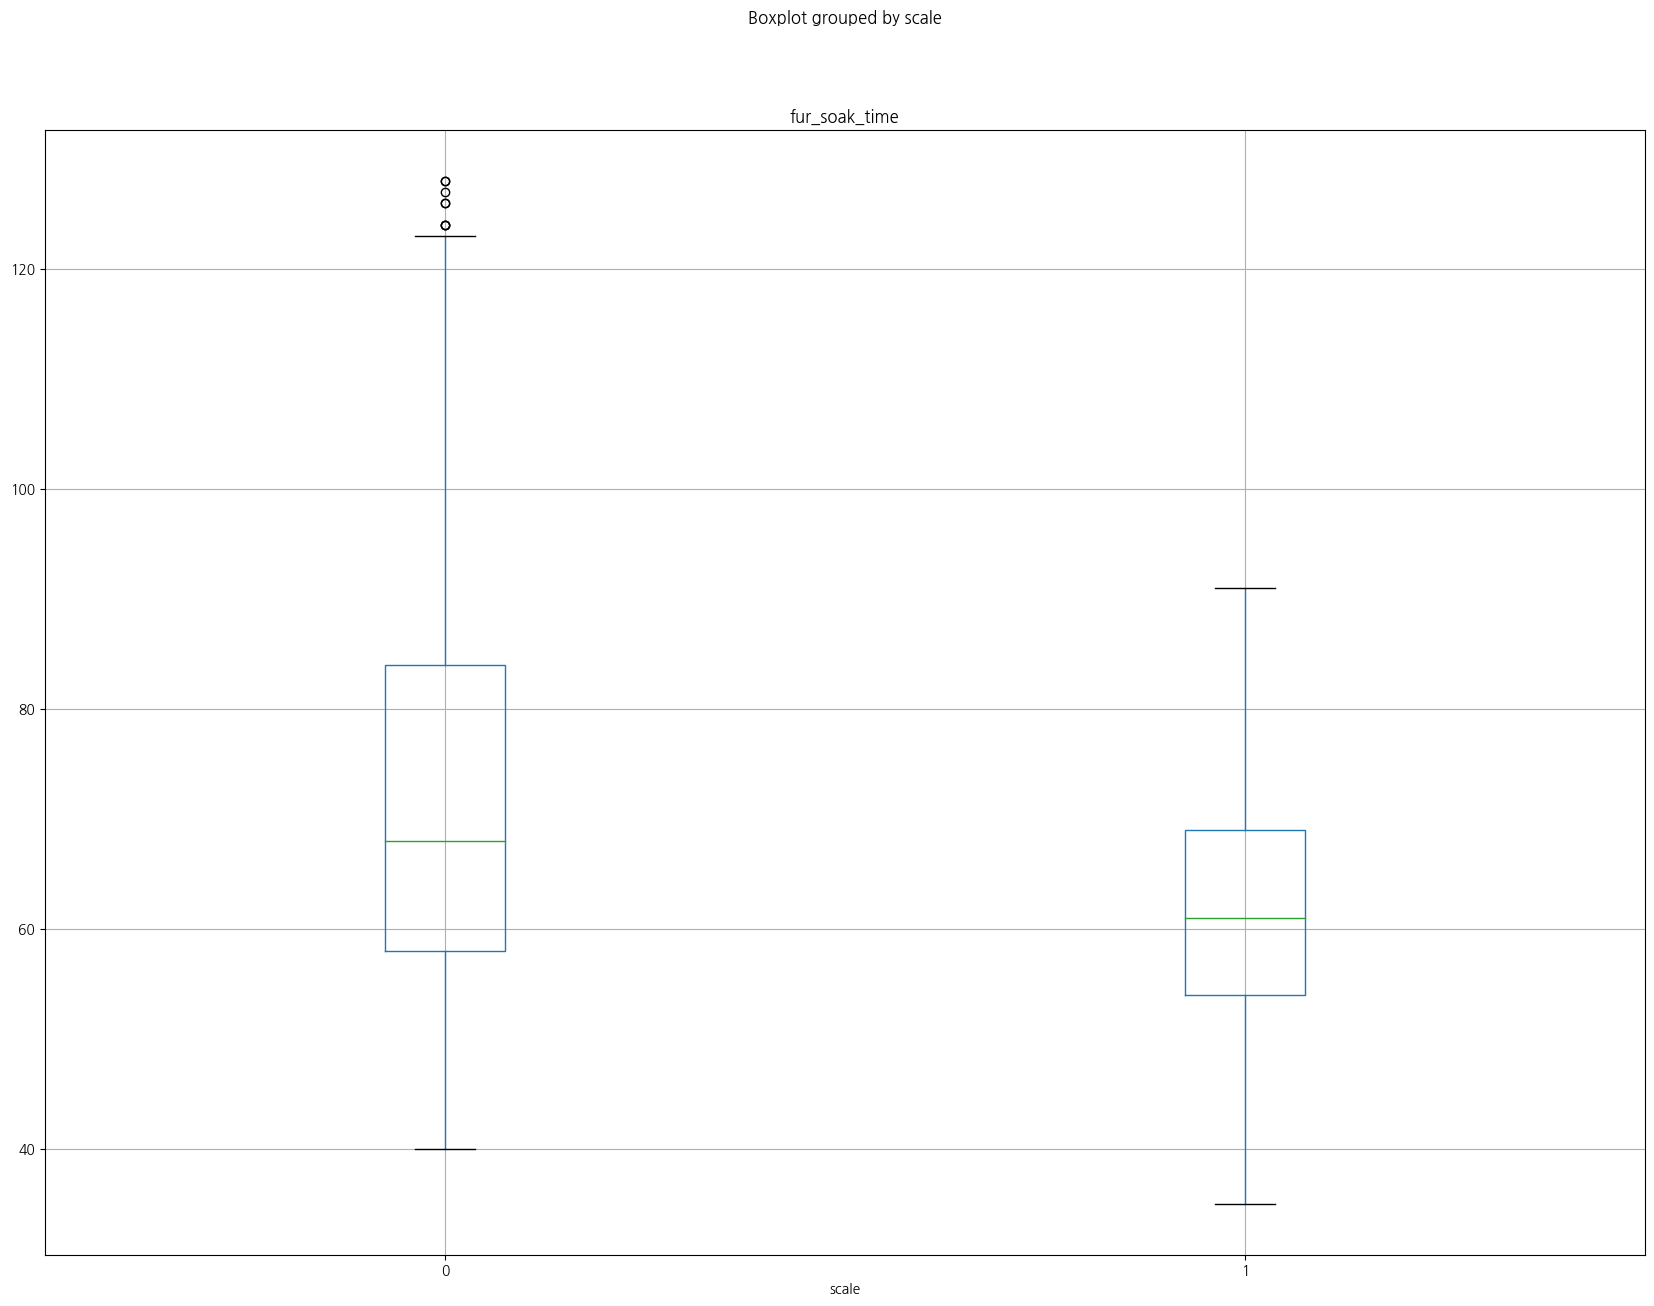

(896, 20)
upper_bound :  351.5
lower_bound :  123.5
upper_bound :  287.0
lower_bound :  159.0


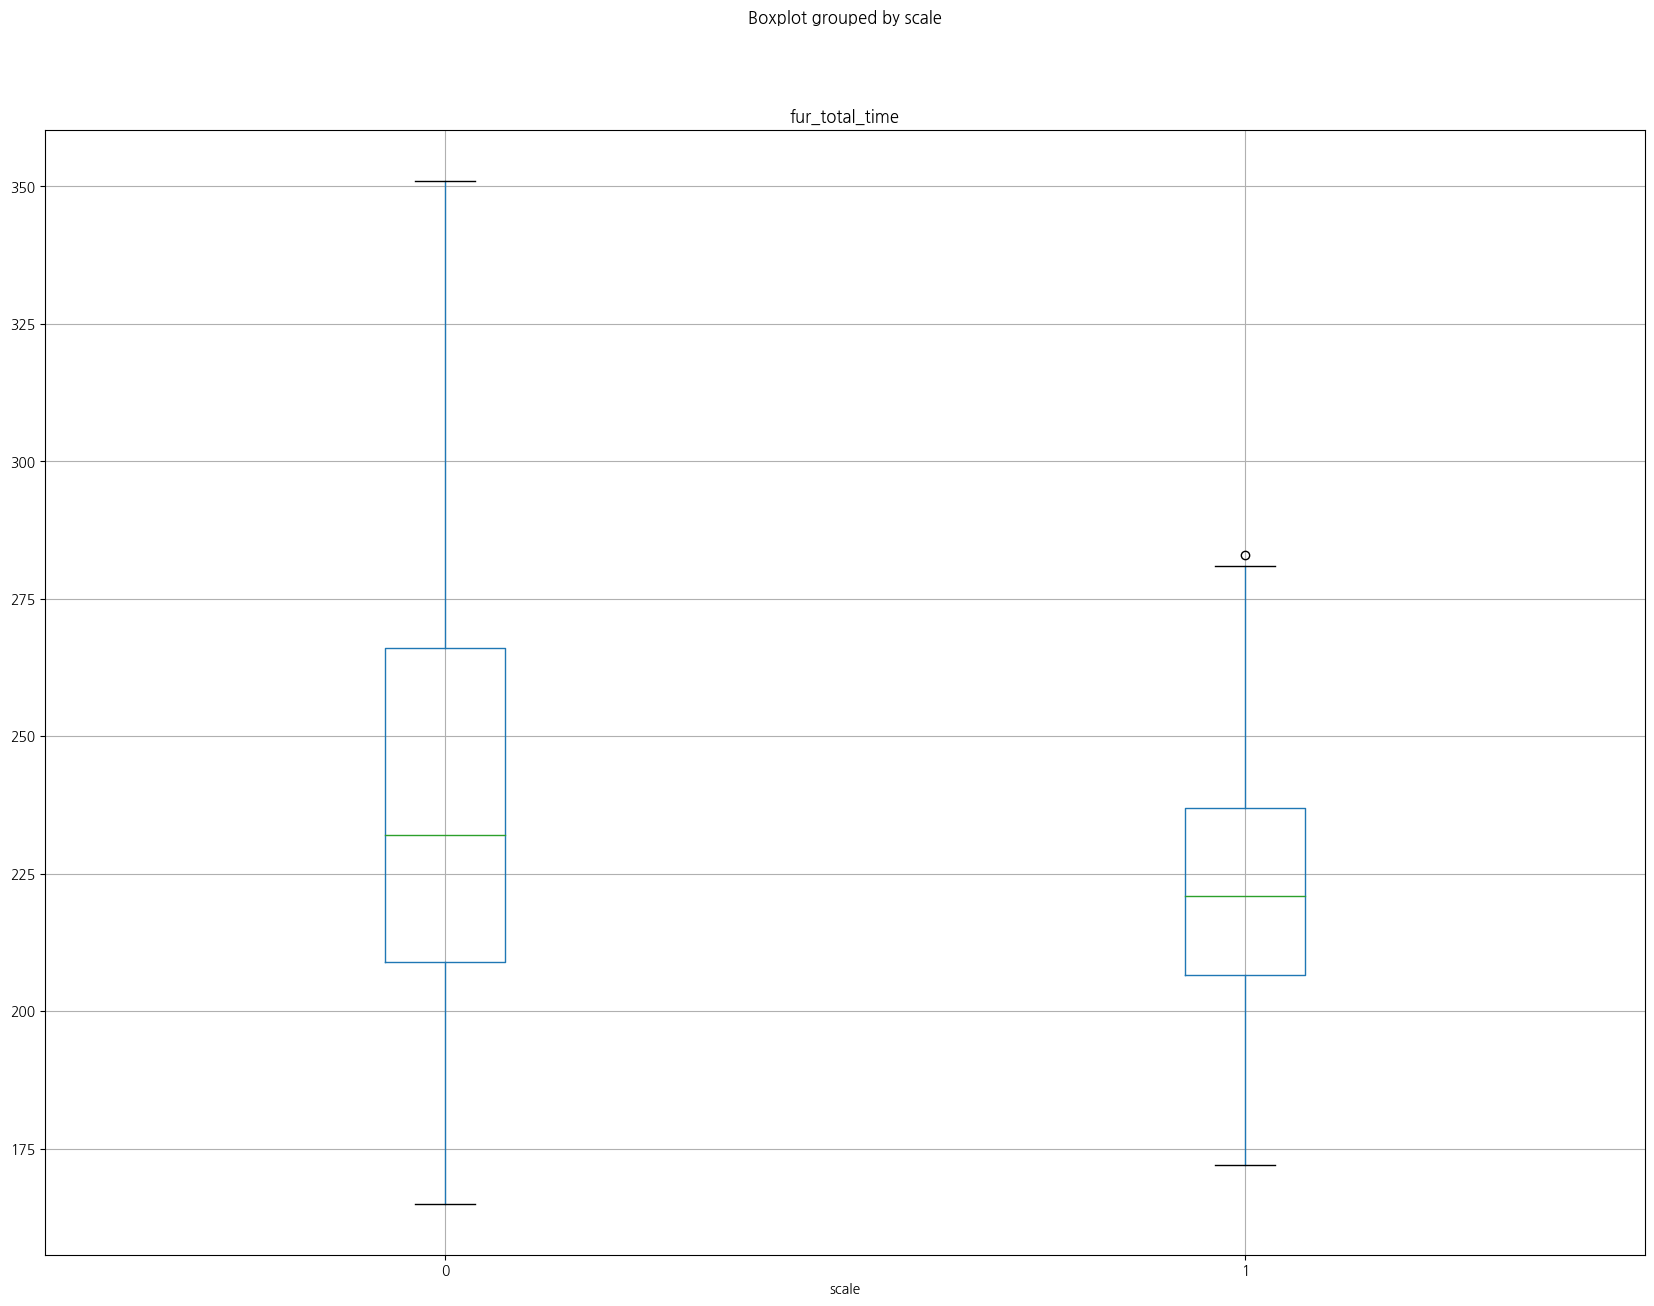

(888, 20)
upper_bound :  1095.5
lower_bound :  747.5
upper_bound :  1088.25
lower_bound :  902.25


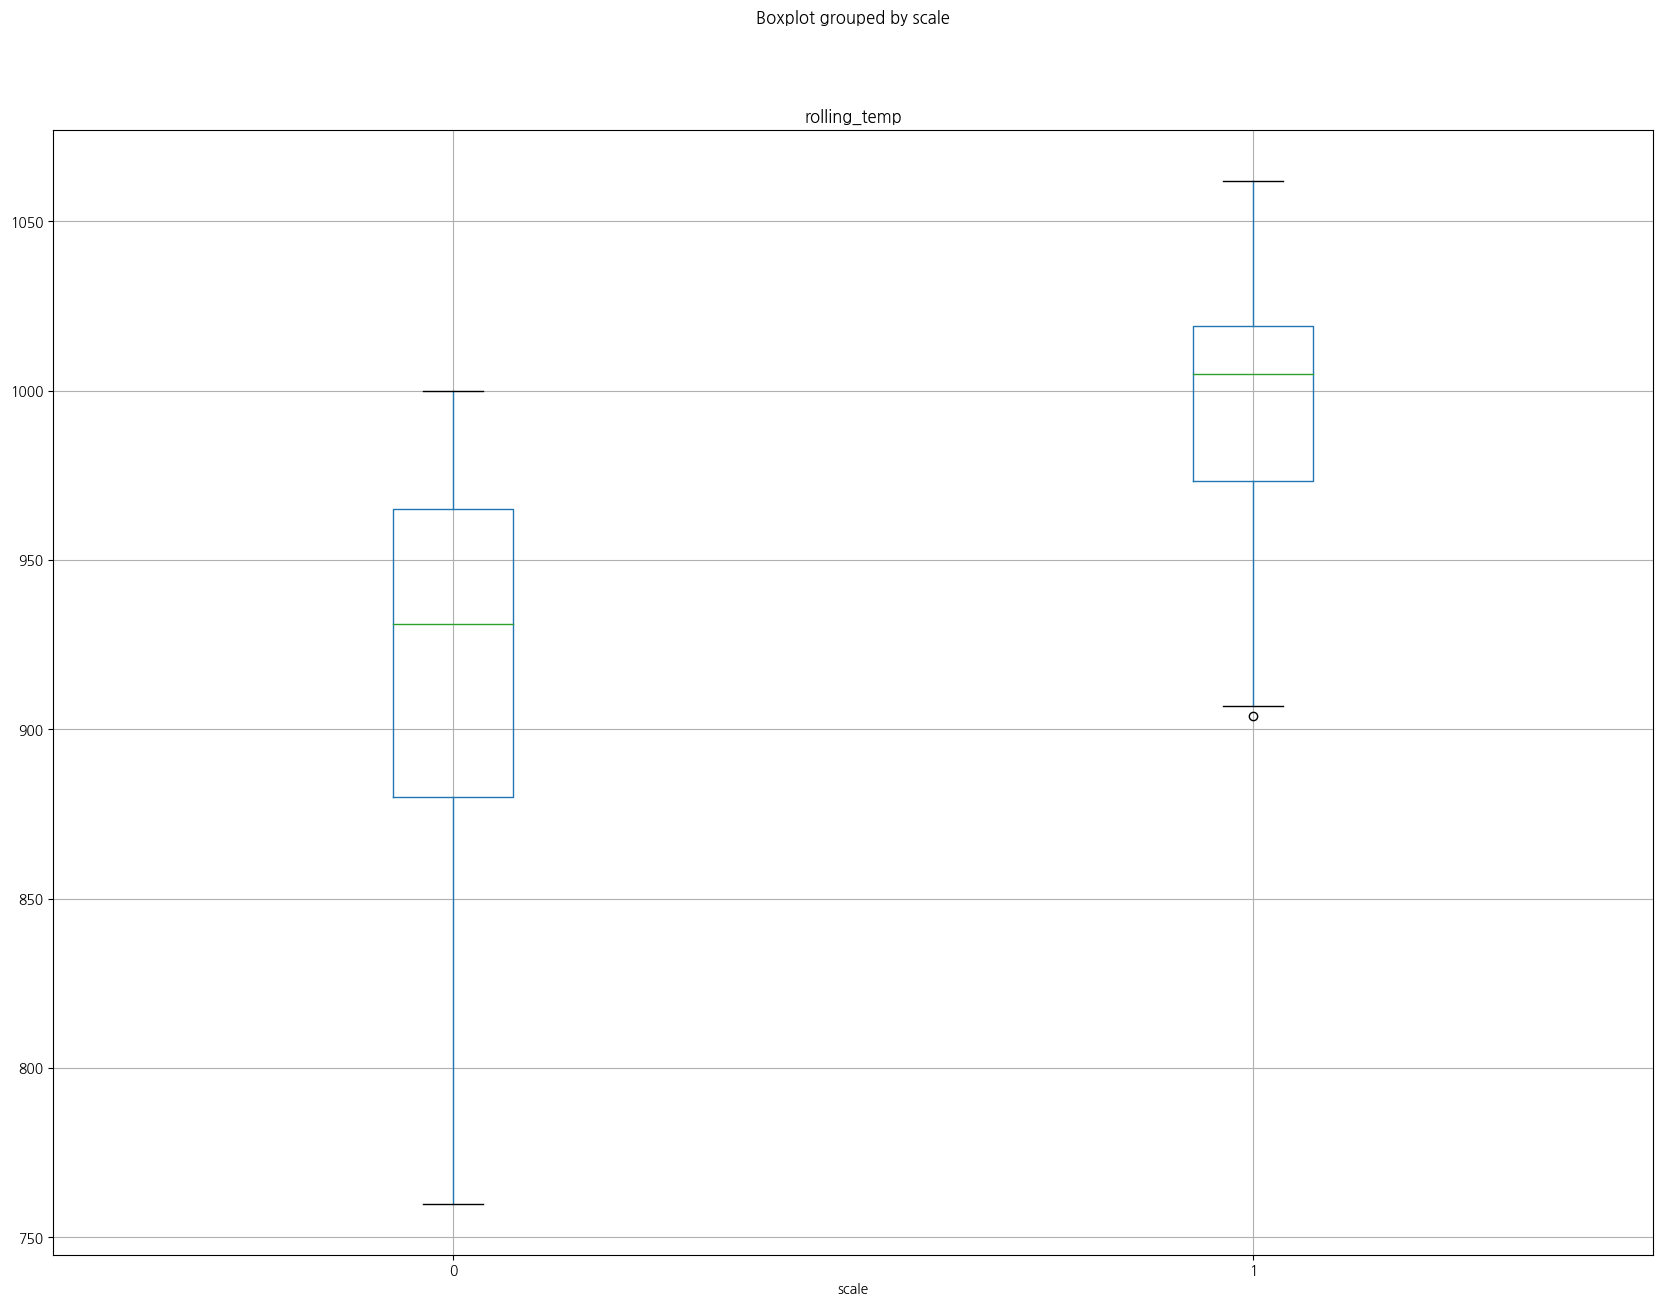

(871, 20)
upper_bound :  13.0
lower_bound :  5.0
upper_bound :  13.0
lower_bound :  5.0


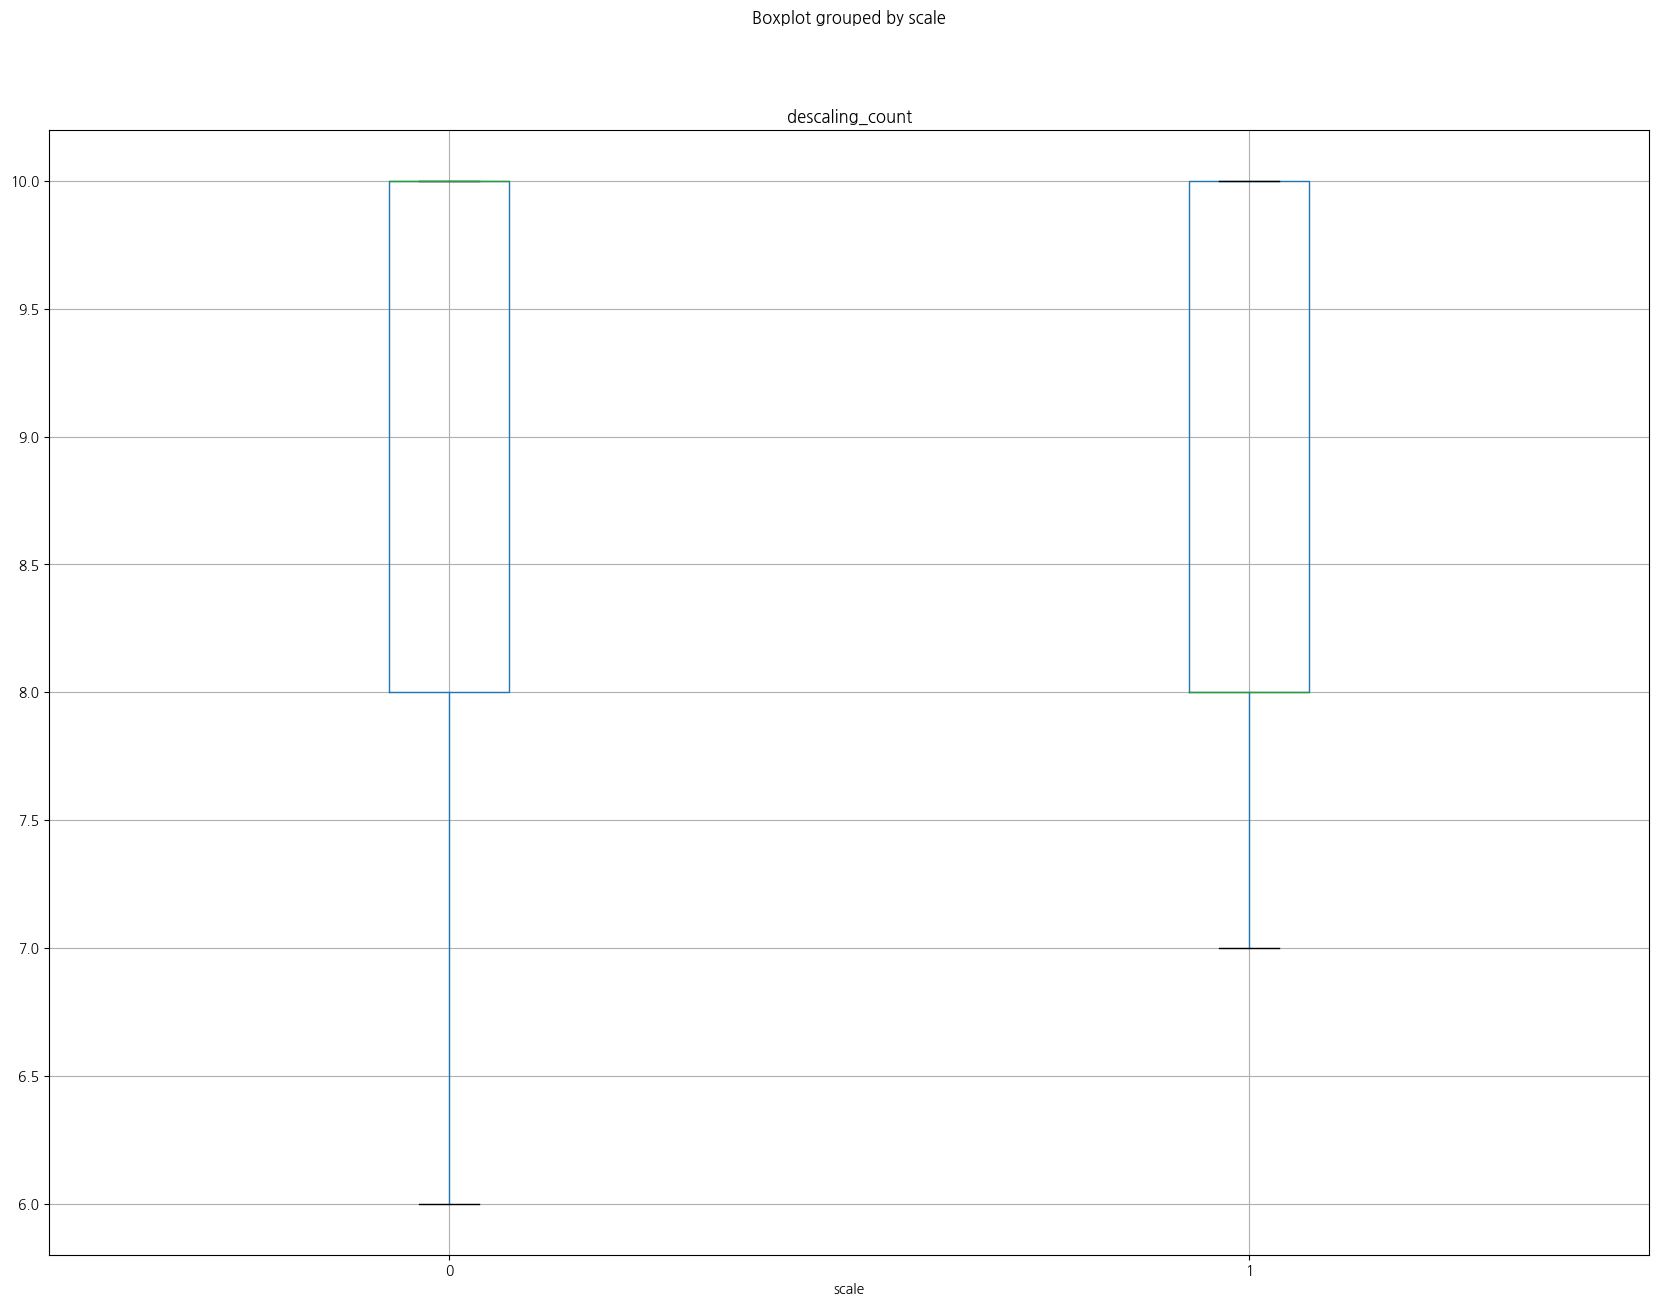

(871, 20)
upper_bound :  1211.0
lower_bound :  1083.0
upper_bound :  1183.0
lower_bound :  1143.0


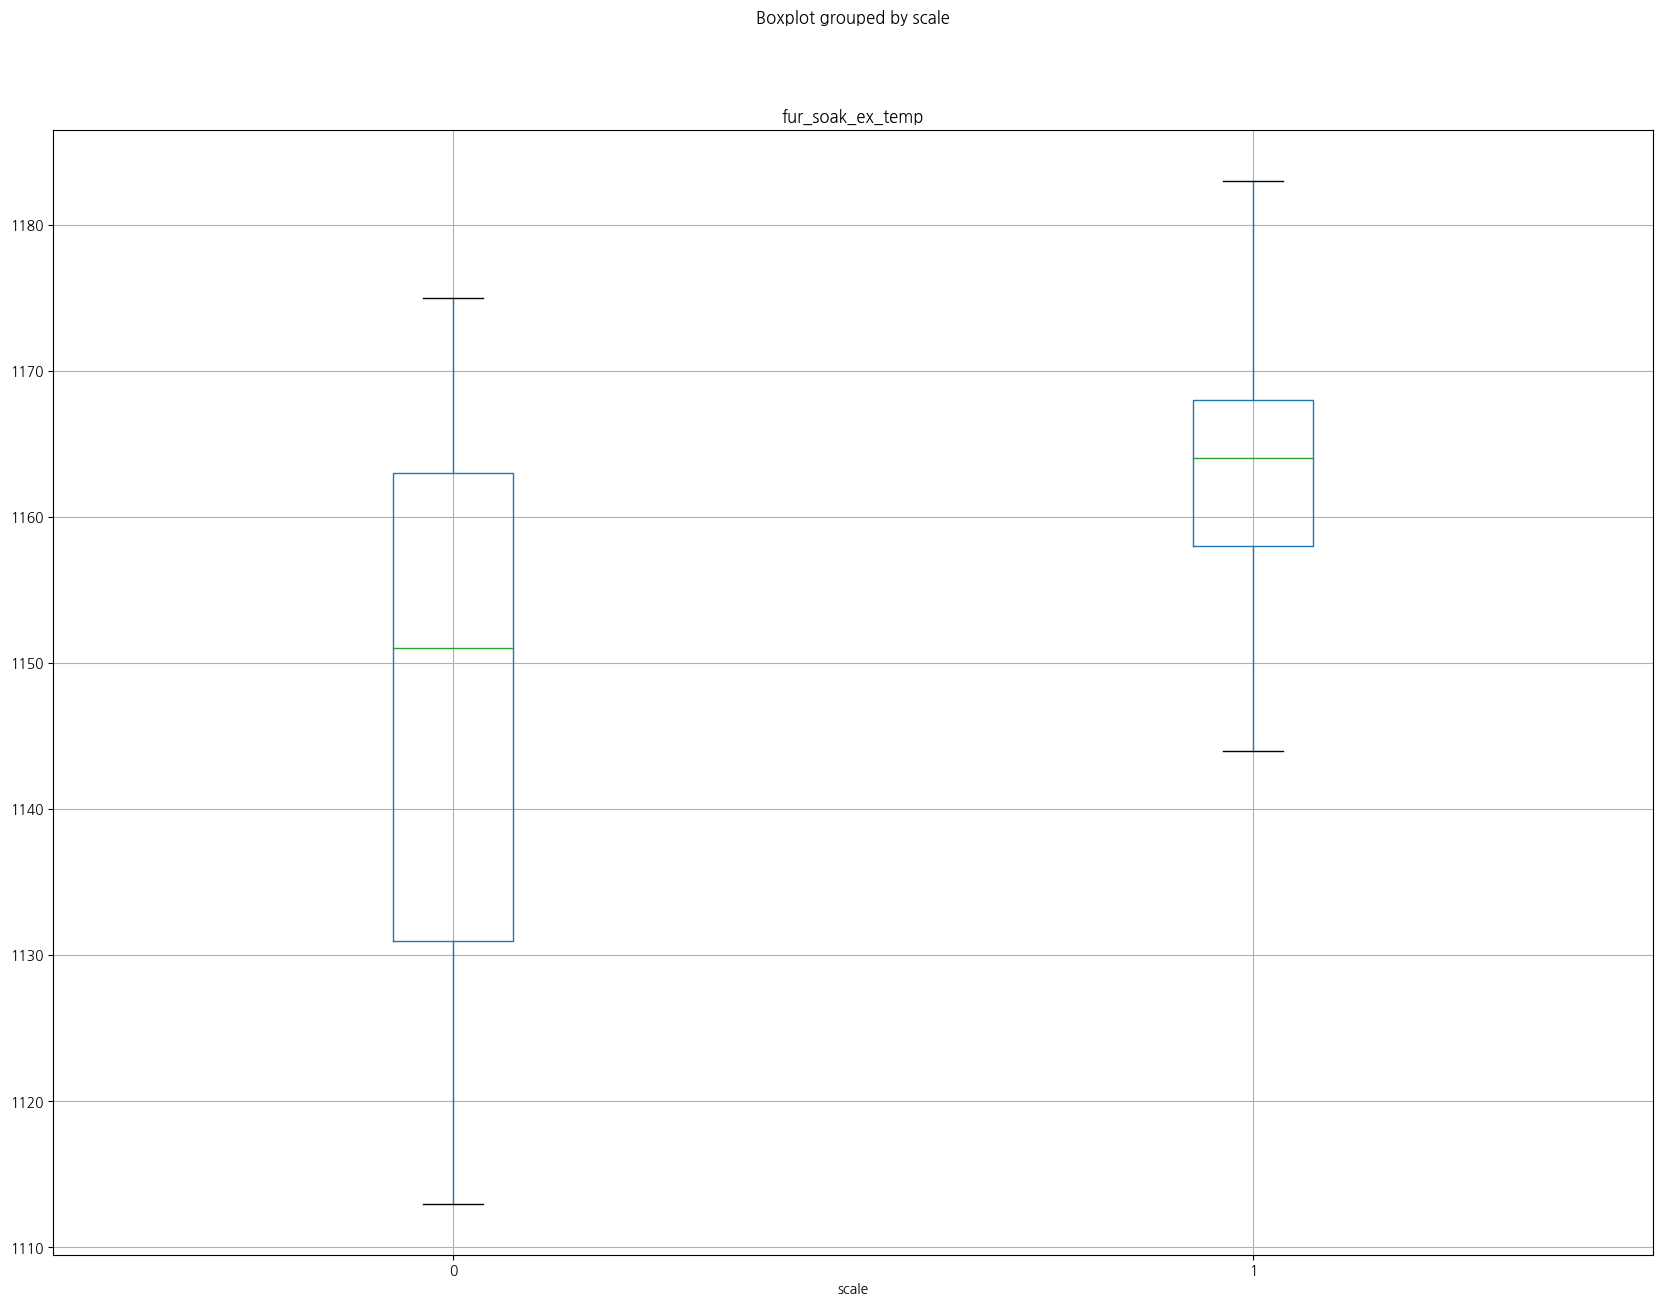

(859, 20)


In [64]:


# 이상치 제거의 상한, 하한 구하기

continuous_variable = ['pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp' , 'fur_heat_time',
                      'fur_soak_time', 'fur_total_time', 'rolling_temp', 'descaling_count',
                      'fur_soak_ex_temp']

for i in continuous_variable :
    for scale_name in df_raw['scale'].unique():
        scale_condition = df_raw['scale'] == scale_name
        upper_bound = outliers_upper_bound(df_raw.loc[scale_condition, i])
        lower_bound = outliers_lower_bound(df_raw.loc[scale_condition, i])    
        print("upper_bound : ",upper_bound)
        print("lower_bound : ",lower_bound)

        # 조건에 해당하는 행의 인덱스 식별
        outliers_indices = df_raw.loc[(df_raw['scale'] == scale_name) & ((df_raw[i] > upper_bound) | (df_raw[i] < lower_bound)), :].index    
        # 행 삭제
        df_raw.drop(outliers_indices, inplace=True)

    # 이상치 제거된 box plot 확인
    df_raw.boxplot(column=i, by='scale', figsize=(20, 15))
    plt.show()
    
    print(df_raw.shape)  # 결측치 잘 제거되었는지 확인


### 탐색적 분석

### 카이제곱 검정

H0 - 강종별로 scale에 영향이 없다. <br>
H1 - 강종별로 scale에 영향이 있다.

In [65]:
df_raw.head()

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_method,rolling_temp,descaling_count,work_group,date,spec_classification,fur_soak_ex_temp
0,0,미국,T,32,3700,15100,적용,1호기,1열,1144,116,59,259,TMCP(온도제어),934,8,1조,2023-01-03,선체구조용,1133
1,0,미국,T,32,3700,15100,적용,1호기,2열,1144,122,53,238,TMCP(온도제어),937,8,1조,2023-01-03,선체구조용,1135
2,0,영국,T,33,3600,19200,적용,2호기,1열,1129,116,55,258,TMCP(온도제어),889,8,1조,2023-01-03,선체구조용,1121
3,0,영국,T,33,3600,19200,적용,2호기,2열,1152,125,68,266,TMCP(온도제어),885,8,1조,2023-01-03,선체구조용,1127
4,0,프랑스,T,38,3100,13300,적용,3호기,1열,1140,134,48,246,TMCP(온도제어),873,8,1조,2023-01-03,선체구조용,1128


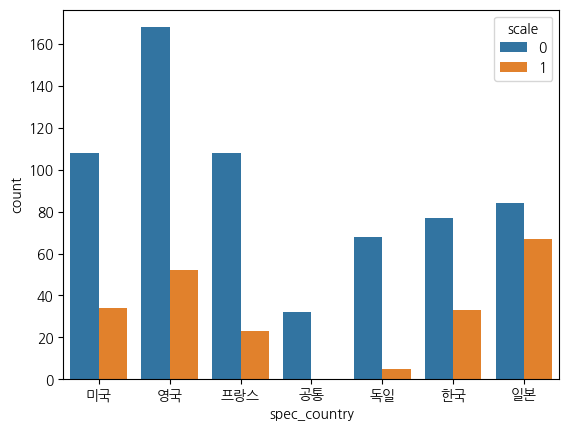

scale vs spec_country
Chi-square statistic: 59.487
P-value: 0.0


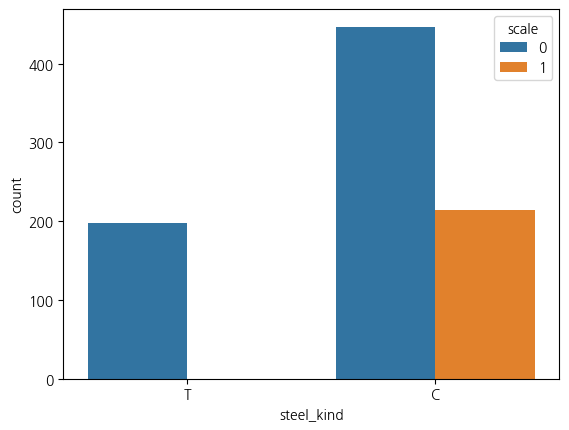

scale vs steel_kind
Chi-square statistic: 83.649
P-value: 0.0


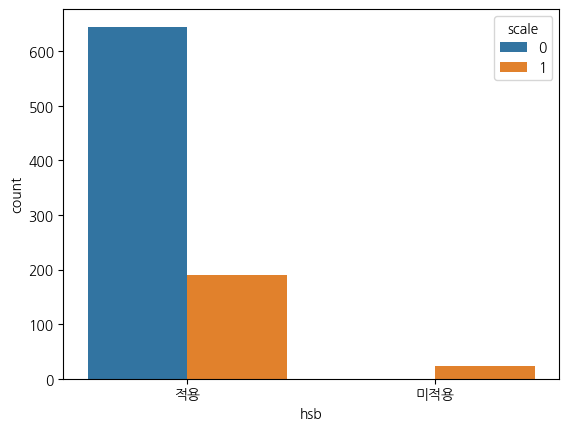

scale vs hsb
Chi-square statistic: 70.343
P-value: 0.0


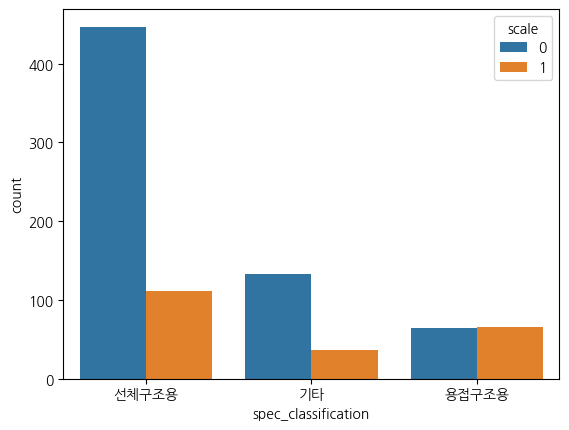

scale vs spec_classification
Chi-square statistic: 53.845
P-value: 0.0


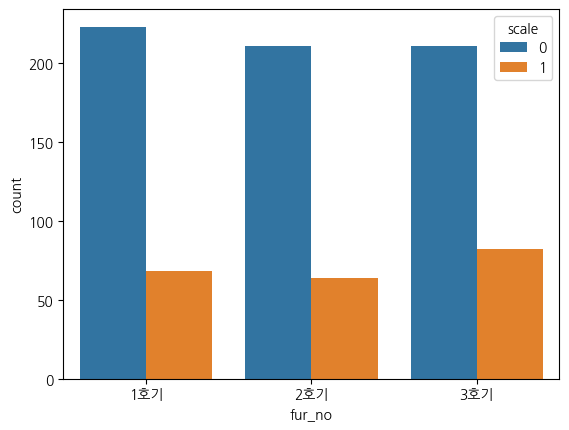

scale vs fur_no
Chi-square statistic: 2.246
P-value: 0.325


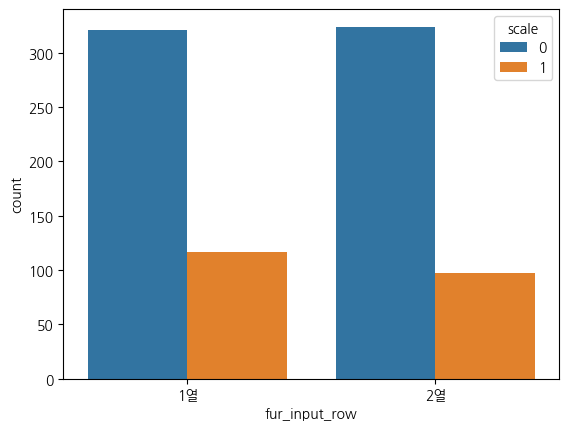

scale vs fur_input_row
Chi-square statistic: 1.357
P-value: 0.244


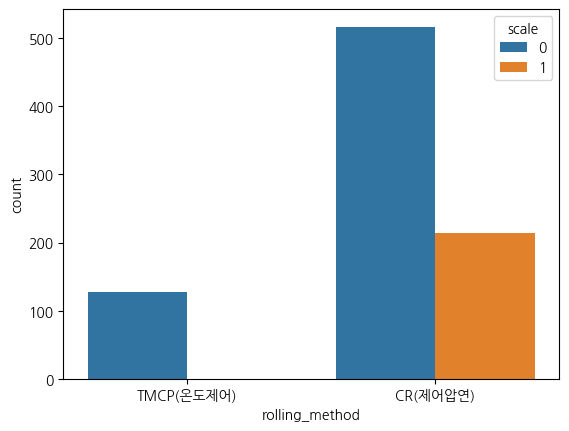

scale vs rolling_method
Chi-square statistic: 48.352
P-value: 0.0


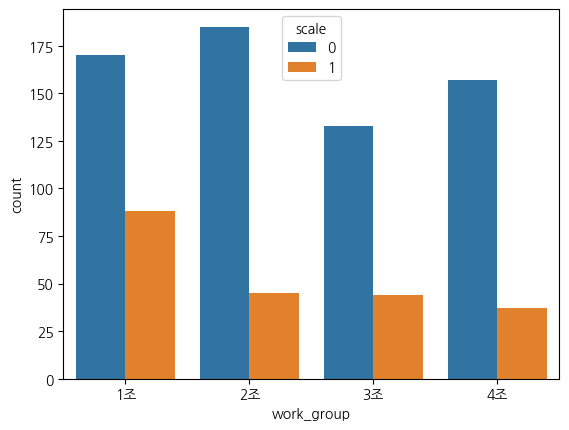

scale vs work_group
Chi-square statistic: 18.717
P-value: 0.0


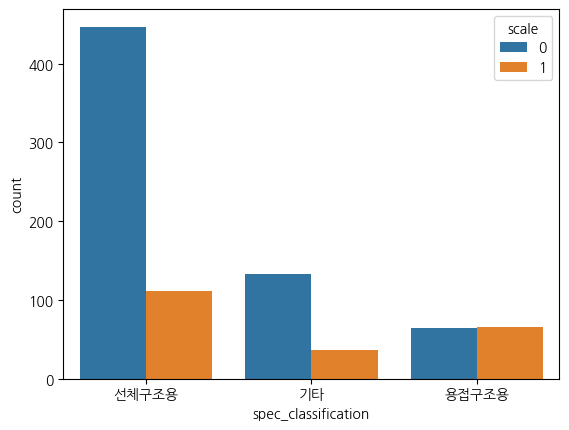

scale vs spec_classification
Chi-square statistic: 53.845
P-value: 0.0


In [66]:
categorical_vars = ['spec_country', 'steel_kind', 'hsb', 'spec_classification', 'fur_no',
                   'fur_input_row', 'rolling_method' , 'work_group' , 'spec_classification']

for i in categorical_vars :
    sns.countplot(data = df_raw, x = i, hue = 'scale')
    plt.show()
    contingency_table = pd.crosstab(df_raw['scale'], df_raw[i])

    # 카이제곱 검정 수행
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print('scale vs {}'.format(i))
    print('Chi-square statistic:', chi2.round(3))
    print('P-value:', p_value.round(3))

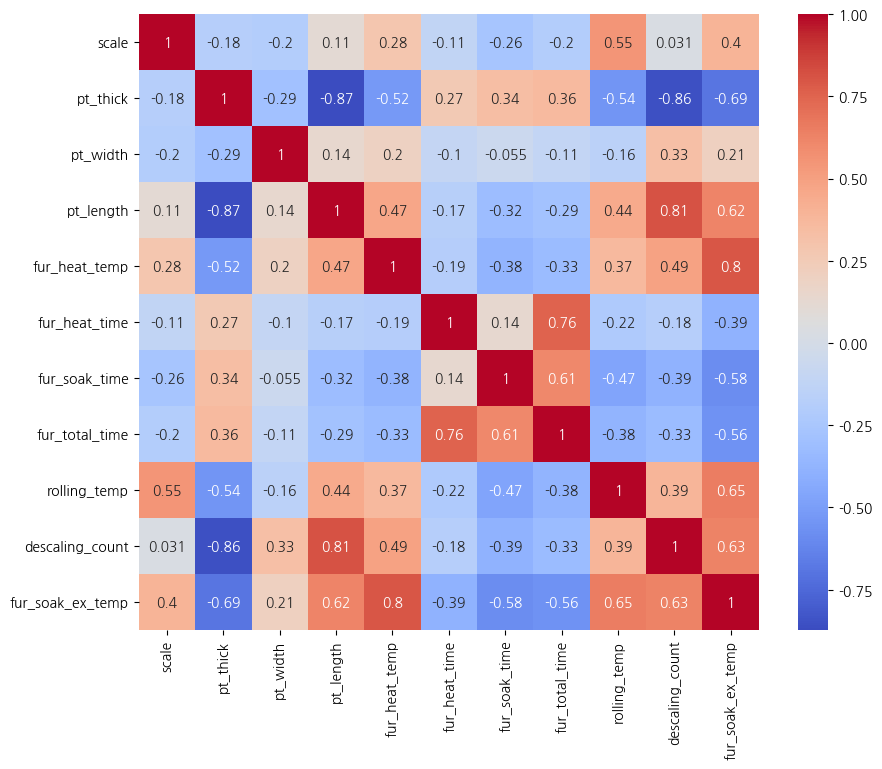

In [68]:
# 연속적인 수치 데이터 열 선택
selected_columns = ['scale', 'pt_thick', 'pt_width', 'pt_length',
                    'fur_heat_temp', 'fur_heat_time', 'fur_soak_time', 'fur_total_time',
                    'rolling_temp', 'descaling_count' , 'fur_soak_ex_temp']
df_selected = df_raw[selected_columns]

# 상관관계 행렬 계산
correlation_matrix = df_selected.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# 그래프 출력
plt.show()

In [72]:
# 상관계수 확인

correlation_df = df_raw.corr(method='pearson').round(3)
print(correlation_df)

                  scale  pt_thick  pt_width  pt_length  fur_heat_temp  \
scale             1.000    -0.179    -0.197      0.109          0.284   
pt_thick         -0.179     1.000    -0.291     -0.873         -0.523   
pt_width         -0.197    -0.291     1.000      0.139          0.202   
pt_length         0.109    -0.873     0.139      1.000          0.471   
fur_heat_temp     0.284    -0.523     0.202      0.471          1.000   
fur_heat_time    -0.112     0.266    -0.104     -0.171         -0.190   
fur_soak_time    -0.262     0.341    -0.055     -0.322         -0.380   
fur_total_time   -0.195     0.362    -0.109     -0.286         -0.327   
rolling_temp      0.551    -0.544    -0.155      0.445          0.370   
descaling_count   0.031    -0.857     0.331      0.813          0.489   
fur_soak_ex_temp  0.398    -0.692     0.208      0.620          0.801   

                  fur_heat_time  fur_soak_time  fur_total_time  rolling_temp  \
scale                    -0.112         -0.

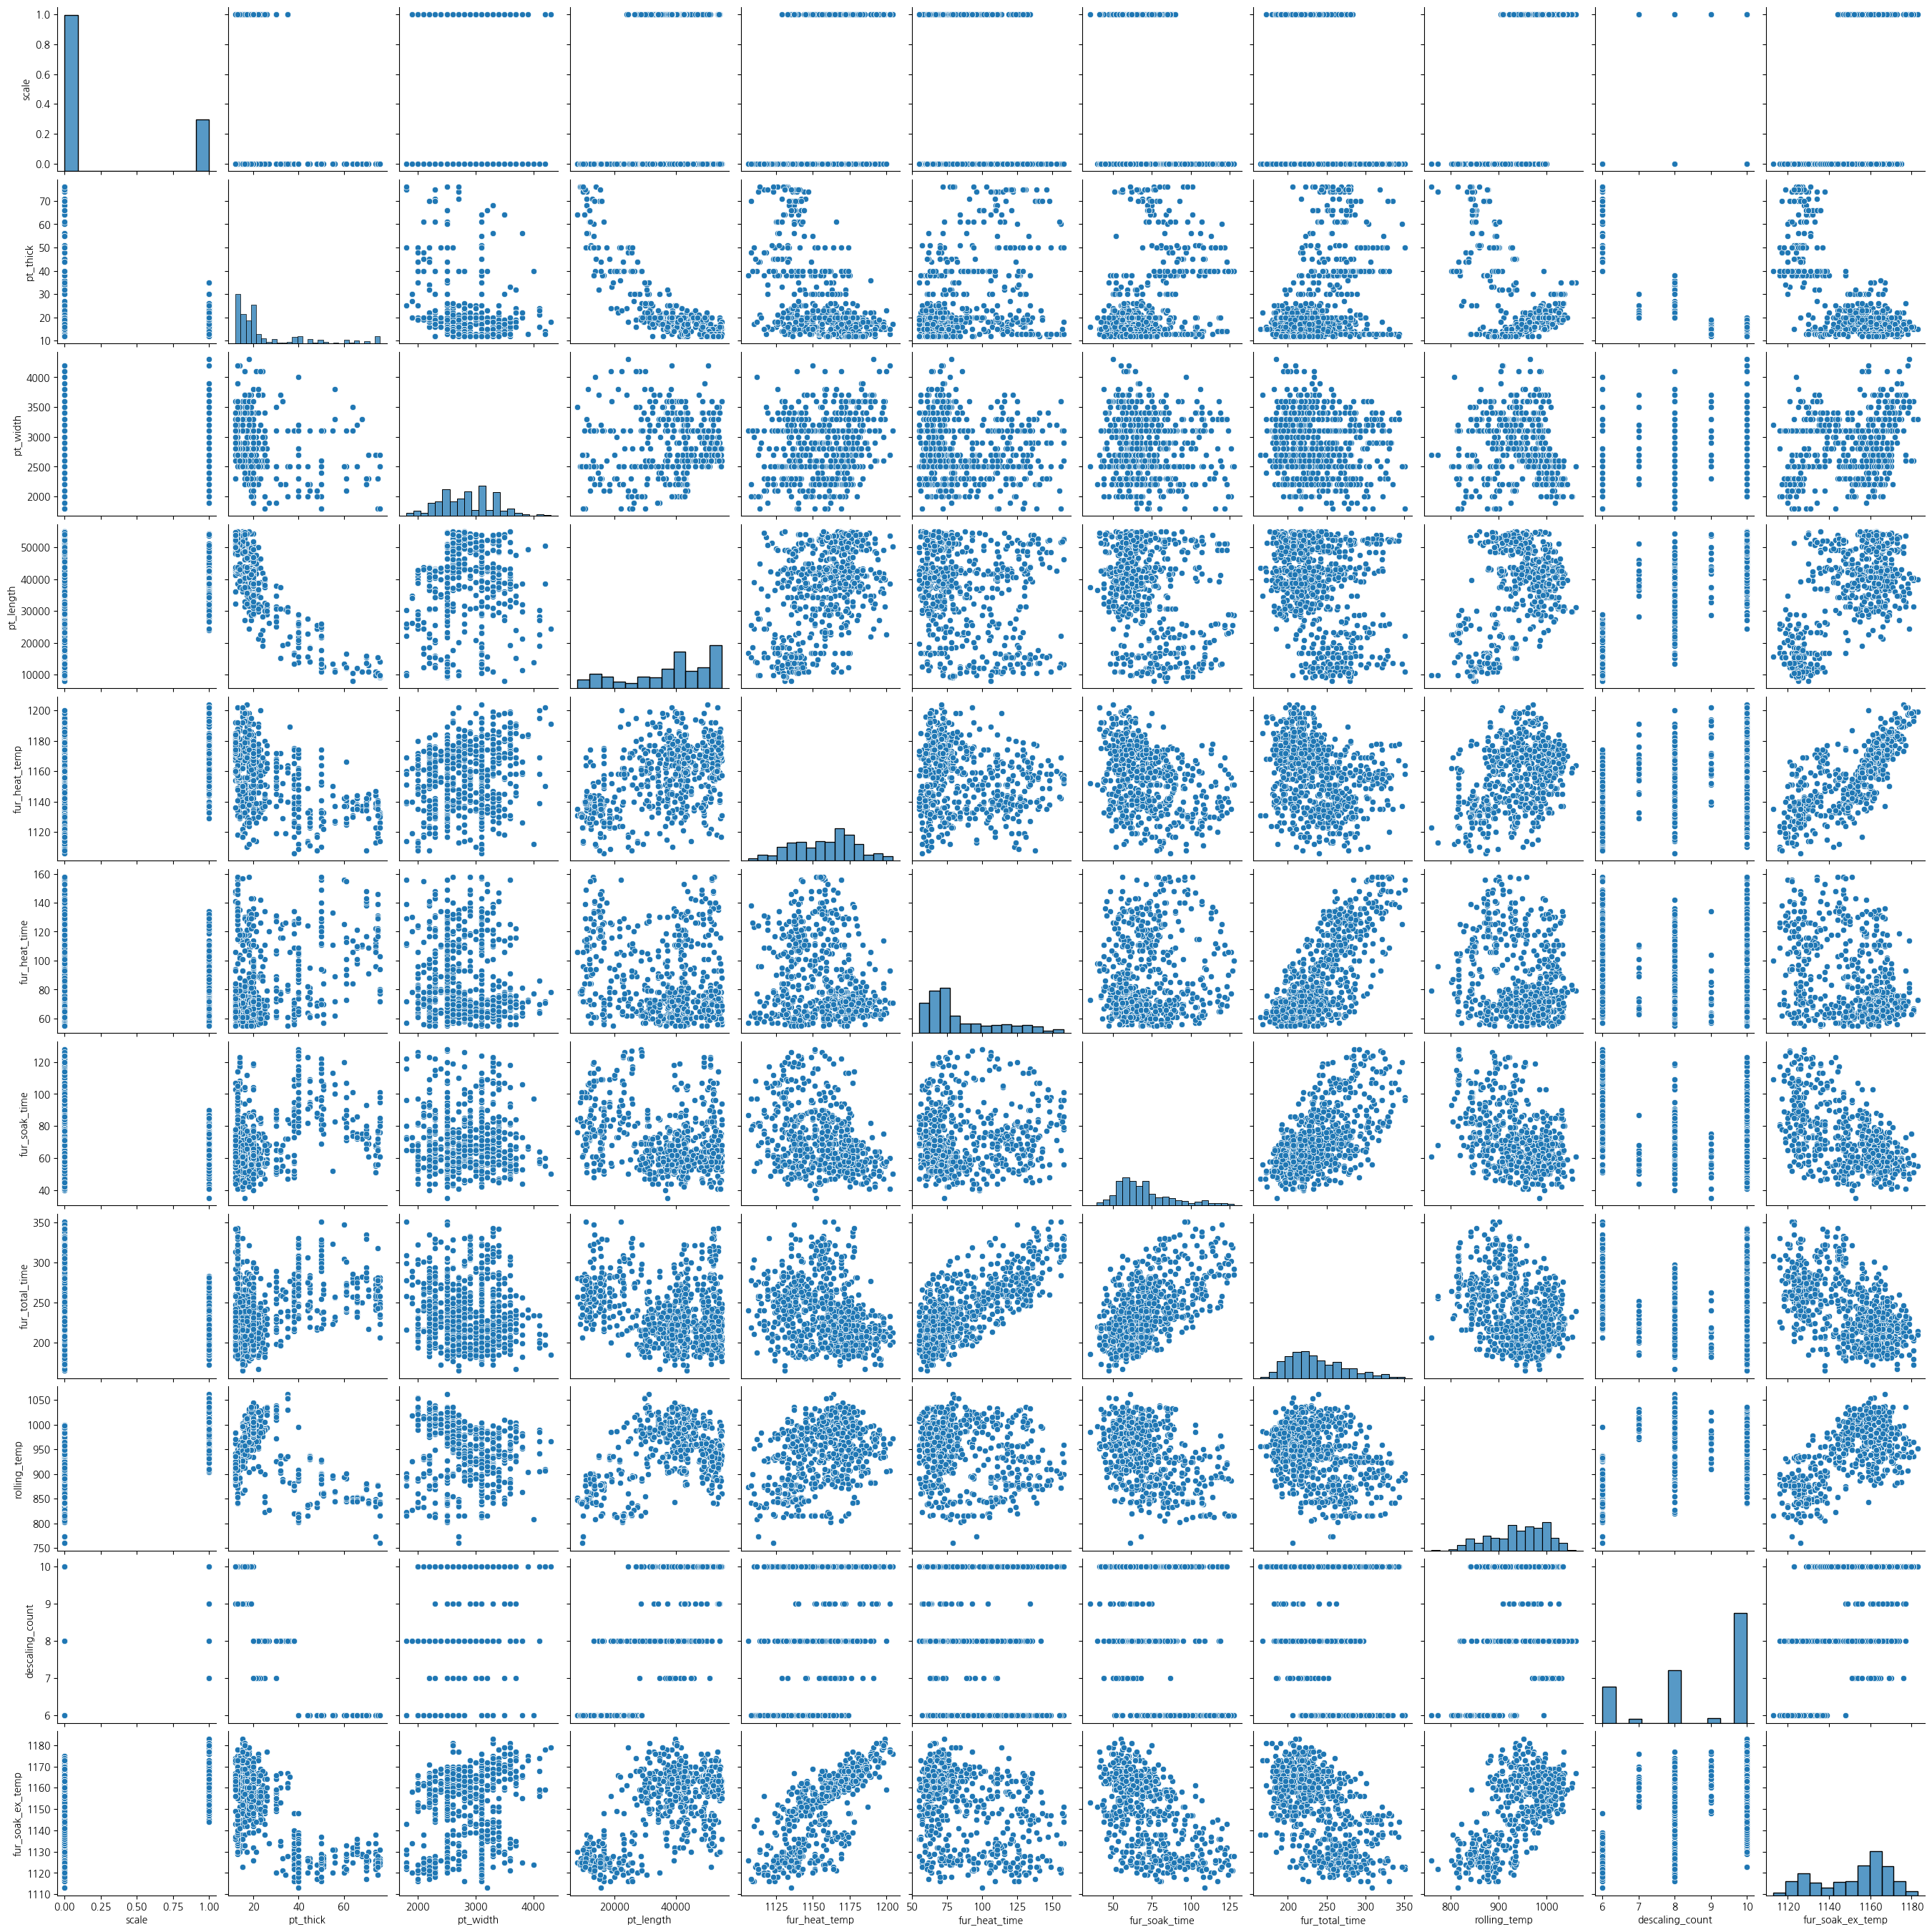

In [74]:
# 산점도 행렬을 그릴 열들을 선택
columns = ['scale', 'pt_thick', 'pt_width', 'pt_length', 'fur_heat_temp', 'fur_heat_time', 
'fur_soak_time', 'fur_total_time', 'rolling_temp', 'descaling_count', 'fur_soak_ex_temp']

# 선택한 열들로 데이터프레임 생성
df_selected = df_raw[columns]

# 산점도 행렬 그리기
sns.pairplot(df_selected)
plt.show()

array([[<Axes: title={'center': 'scale'}>,
        <Axes: title={'center': 'pt_thick'}>,
        <Axes: title={'center': 'pt_width'}>],
       [<Axes: title={'center': 'pt_length'}>,
        <Axes: title={'center': 'fur_heat_temp'}>,
        <Axes: title={'center': 'fur_heat_time'}>],
       [<Axes: title={'center': 'fur_soak_time'}>,
        <Axes: title={'center': 'fur_total_time'}>,
        <Axes: title={'center': 'rolling_temp'}>],
       [<Axes: title={'center': 'descaling_count'}>,
        <Axes: title={'center': 'fur_soak_ex_temp'}>, <Axes: >]],
      dtype=object)

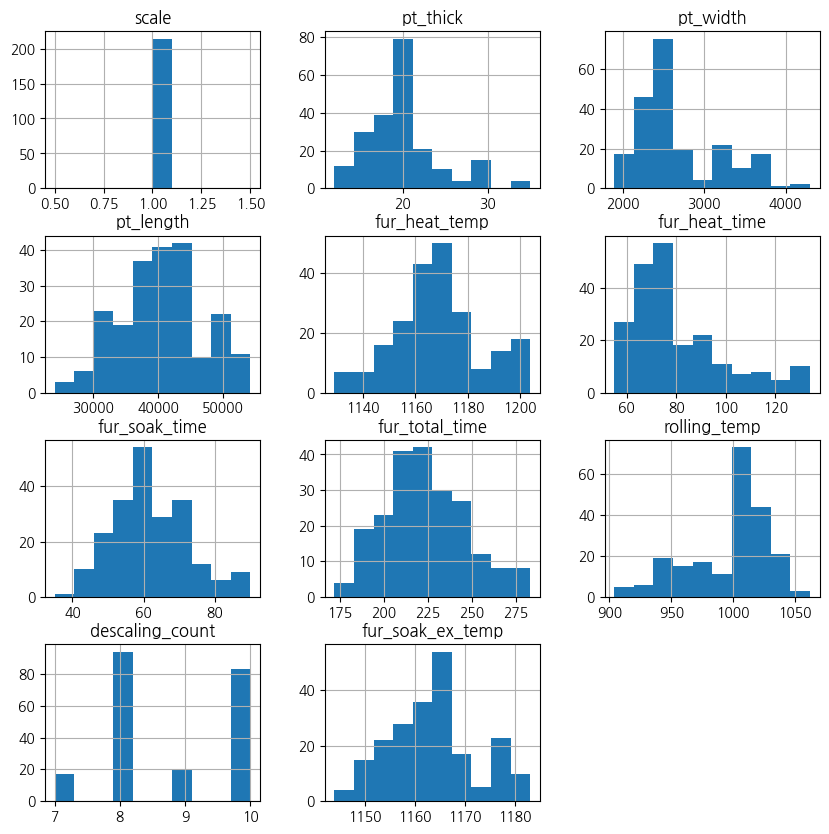

In [75]:
df_raw[df_raw['scale']==1].hist(figsize=(10, 10))

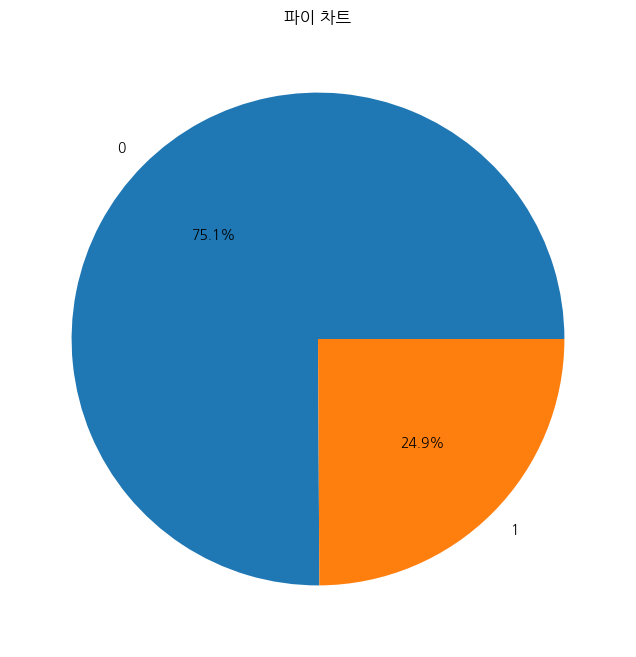

In [80]:
import matplotlib.pyplot as plt

# 각 카테고리의 개수 또는 비율 계산
category_counts = df_raw['scale'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(8, 8))  # 차트의 크기 설정
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('파이 차트')  # 차트의 제목 설정
plt.show()

### 로지스틱 회귀 분석

In [ ]:
# # diagnosis 데이터를 0과 1로 변환
# df_raw["scale"] = df_raw["scale"].map({"양품": 0, "불량": 1})
# df_raw.head()

In [81]:
# 데이터 분할
df_train, df_test = train_test_split(df_raw,
                                    test_size = 0.3, 
                                    random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (601, 20)
test data size : (258, 20)


In [82]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 859 entries, 0 to 999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scale                859 non-null    int64 
 1   spec_country         859 non-null    object
 2   steel_kind           859 non-null    object
 3   pt_thick             859 non-null    int64 
 4   pt_width             859 non-null    int64 
 5   pt_length            859 non-null    int64 
 6   hsb                  859 non-null    object
 7   fur_no               859 non-null    object
 8   fur_input_row        859 non-null    object
 9   fur_heat_temp        859 non-null    int64 
 10  fur_heat_time        859 non-null    int64 
 11  fur_soak_time        859 non-null    int64 
 12  fur_total_time       859 non-null    int64 
 13  rolling_method       859 non-null    object
 14  rolling_temp         859 non-null    int64 
 15  descaling_count      859 non-null    int64 
 16  work_gro

In [83]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,work_group_4조,date_2023-01-04,date_2023-01-05,date_2023-01-06,date_2023-01-07,date_2023-01-08,date_2023-01-09,date_2023-01-10,spec_classification_선체구조용,spec_classification_용접구조용
0,0,32,3700,15100,1144,116,59,259,934,8,...,0,0,0,0,0,0,0,0,1,0
1,0,32,3700,15100,1144,122,53,238,937,8,...,0,0,0,0,0,0,0,0,1,0
2,0,33,3600,19200,1129,116,55,258,889,8,...,0,0,0,0,0,0,0,0,1,0
3,0,33,3600,19200,1152,125,68,266,885,8,...,0,0,0,0,0,0,0,0,1,0
4,0,38,3100,13300,1140,134,48,246,873,8,...,0,0,0,0,0,0,0,0,1,0


In [86]:
# 로지스틱 모델 생성

import pandas as pd
import statsmodels.api as sm

log_model = Logit.from_formula("""scale ~ pt_thick + pt_width + pt_length + fur_heat_temp + fur_heat_time + fur_soak_time + 
fur_total_time + rolling_temp + descaling_count + fur_soak_ex_temp """, df_train)

# log_model = Logit.from_formula("""scale ~ rolling_date + C(spec_long) + C(spec_country) + C(steel_kind) + pt_thick
# + pt_width + pt_length + C(hsb) + C(fur_no) + C(fur_input_row) + fur_heat_temp + fur_heat_time
# + fur_soak_temp + fur_soak_time + fur_total_time + fur_ex_temp + C(rolling_method) + rolling_temp
# +descaling_count + C(work_group)""", df_train)

# log_model = Logit.from_formula("""scale ~ rolling_date + C(spec_long) + C(spec_country) + C(steel_kind) + pt_thick""", df_train)


log_result = log_model.fit()
print(log_result.summary())

Optimization terminated successfully.
         Current function value: 0.303135
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                  scale   No. Observations:                  601
Model:                          Logit   Df Residuals:                      590
Method:                           MLE   Df Model:                           10
Date:                Wed, 24 May 2023   Pseudo R-squ.:                  0.4551
Time:                        00:57:37   Log-Likelihood:                -182.18
converged:                       True   LL-Null:                       -334.35
Covariance Type:            nonrobust   LLR p-value:                 1.895e-59
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -173.5482     27.079     -6.409      0.000    -226.621    -120.475
pt_thick  

In [87]:
# train 데이터 예측
y_pred_train = log_result.predict(df_train)

y_pred_train_class = (y_pred_train > 0.5).astype(int)
print("Train 예측 결과 \n", y_pred_train_class.head(), '\n')
print("Confusion Matrix: \n{}".format(confusion_matrix(df_train["scale"], y_pred_train_class)), "\n")

# test 데이터 예측
y_pred_test = log_result.predict(df_test)

y_pred_test_class = (y_pred_test > 0.5).astype(int)
print("Test 예측 결과 \n", y_pred_test_class.head(), "\n")
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["scale"], y_pred_test_class)), "\n")

Train 예측 결과 
 785    0
971    0
183    1
524    0
543    0
dtype: int64 

Confusion Matrix: 
[[417  37]
 [ 55  92]] 

Test 예측 결과 
 516    0
162    1
136    0
266    1
375    0
dtype: int64 

Confusion Matrix: 
[[173  18]
 [ 14  53]] 



<Axes: >

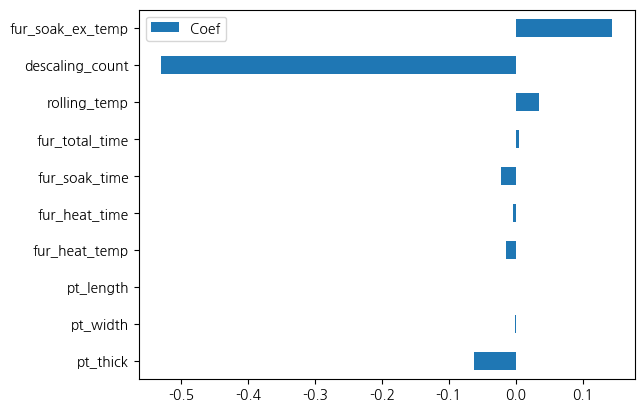

In [88]:
# 최종 회귀식

# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef" : log_result.params.values[1:]}, index = log_model.exog_names[1:])
df_logistic_coef.plot.barh(y = "Coef")

### 의사결정

In [91]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,work_group_4조,date_2023-01-04,date_2023-01-05,date_2023-01-06,date_2023-01-07,date_2023-01-08,date_2023-01-09,date_2023-01-10,spec_classification_선체구조용,spec_classification_용접구조용
0,0,32,3700,15100,1144,116,59,259,934,8,...,0,0,0,0,0,0,0,0,1,0
1,0,32,3700,15100,1144,122,53,238,937,8,...,0,0,0,0,0,0,0,0,1,0
2,0,33,3600,19200,1129,116,55,258,889,8,...,0,0,0,0,0,0,0,0,1,0
3,0,33,3600,19200,1152,125,68,266,885,8,...,0,0,0,0,0,0,0,0,1,0
4,0,38,3100,13300,1140,134,48,246,873,8,...,0,0,0,0,0,0,0,0,1,0


In [92]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (859, 34)
분할 후 설명변수 데이터 : Train (601, 34) Test (258, 34)


In [93]:
# 기본 옵션으로 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Accuracy on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Accuracy on training set: 1.000
Accuracy on test set: 0.957


In [94]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = DecisionTreeClassifier()

param_grid = {
    "max_depth": [i for i in range(1, 11)],
    "min_samples_split": [10*i for i in range(1, 11)],
    "min_samples_leaf": [2*i for i in range(1, 11)]
}

grid_dt = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("\nbest prameter: \n{}".format(grid_dt.best_params_))
# print("\nbest score: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=30)

best prameter: 
{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 30}

best score: 
0.975


In [102]:
# 최종 모델 생성
dt_final = DecisionTreeRegressor (max_depth=6, min_samples_leaf=2, min_samples_split=30)
dt_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(dt_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(dt_final.score(df_test_x, df_test_y)))

Score on training set:0.943
Score on test set:0.910


In [103]:
# feature_importances 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = dt_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,rolling_temp,0.595
9,fur_soak_ex_temp,0.173
17,hsb_적용,0.163
8,descaling_count,0.067
2,pt_length,0.002
32,spec_classification_선체구조용,0.000
31,date_2023-01-10,0.000
30,date_2023-01-09,0.000
29,date_2023-01-08,0.000
19,fur_no_3호기,0.000


Text(0, 0.5, '변수')

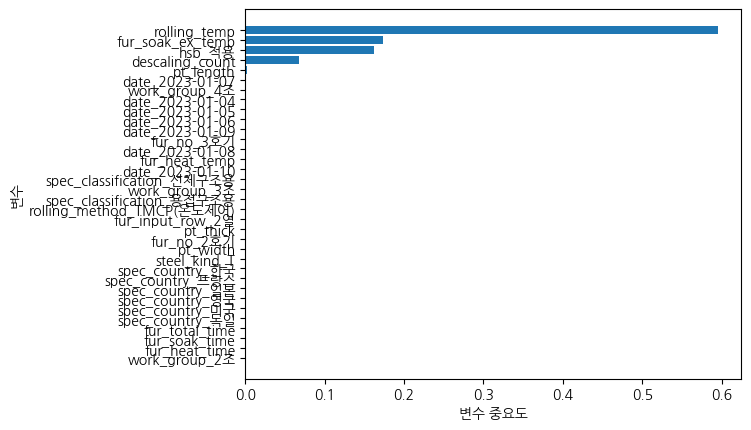

In [104]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 랜덤 포레스트

In [95]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,work_group_4조,date_2023-01-04,date_2023-01-05,date_2023-01-06,date_2023-01-07,date_2023-01-08,date_2023-01-09,date_2023-01-10,spec_classification_선체구조용,spec_classification_용접구조용
0,0,32,3700,15100,1144,116,59,259,934,8,...,0,0,0,0,0,0,0,0,1,0
1,0,32,3700,15100,1144,122,53,238,937,8,...,0,0,0,0,0,0,0,0,1,0
2,0,33,3600,19200,1129,116,55,258,889,8,...,0,0,0,0,0,0,0,0,1,0
3,0,33,3600,19200,1152,125,68,266,885,8,...,0,0,0,0,0,0,0,0,1,0
4,0,38,3100,13300,1140,134,48,246,873,8,...,0,0,0,0,0,0,0,0,1,0


In [96]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (859, 34)
분할 후 설명변수 데이터 : Train (601, 34) Test (258, 34)


In [97]:
# 기본 옵션으로 모델생성
rf_uncutomized = RandomForestClassifier(random_state = 1234)
rf_uncutomized.fit(df_train_x, df_train_y)

print("Accuracy on training set:{:.3f}".format(rf_uncutomized.score(df_train_x, df_train_y)))
print("Accuracy on test set:{:.3f}".format(rf_uncutomized.score(df_test_x, df_test_y)))

Accuracy on training set:1.000
Accuracy on test set:0.977


In [99]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = RandomForestClassifier(random_state = 1234)

param_grid = {
    "n_estimators" : [50, 70, 90, 110, 130],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [20, 30, 40, 50, 60],
    "min_samples_leaf": [4, 8, 12, 16, 20, 24, 28, 32]
}

grid_rf = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_rf.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_rf.best_estimator_))
print("\nbest prameter: \n{}".format(grid_rf.best_params_))
# print("\nbest score: \n{}".format(grid_rf.best_score_.round(3)))

best estimator model: 
RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=50,
                       n_estimators=70, random_state=1234)

best prameter: 
{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 50, 'n_estimators': 70}

best score: 
0.958


In [130]:
# 최종 모델 생성
rf_final = RandomForestRegressor (max_depth=6, min_samples_leaf=4, min_samples_split=50,
                       n_estimators=70, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set:0.911
Score on test set:0.911


In [131]:
# feature_importances 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,rolling_temp,0.606
9,fur_soak_ex_temp,0.186
17,hsb_적용,0.169
8,descaling_count,0.024
6,fur_total_time,0.004
26,date_2023-01-05,0.004
0,pt_thick,0.003
5,fur_soak_time,0.002
3,fur_heat_temp,0.001
2,pt_length,0.001


Text(0, 0.5, '변수')

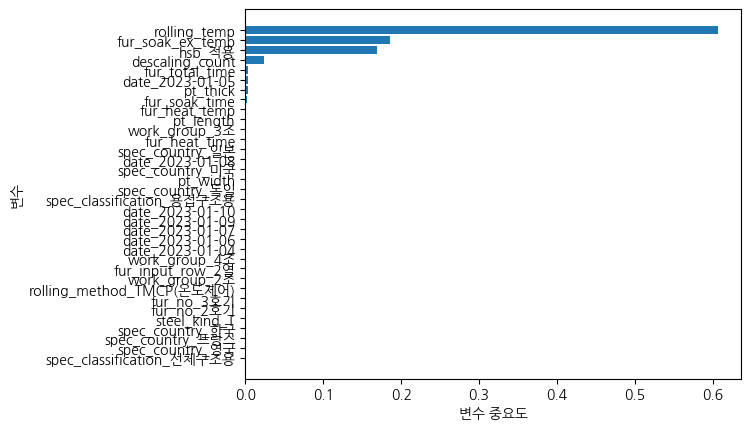

In [132]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 그래디언트 부스팅

In [114]:
df_raw_dummy = pd.get_dummies(df_raw, drop_first = True)
df_raw_dummy.head()

,scale,pt_thick,pt_width,pt_length,fur_heat_temp,fur_heat_time,fur_soak_time,fur_total_time,rolling_temp,descaling_count,...,work_group_4조,date_2023-01-04,date_2023-01-05,date_2023-01-06,date_2023-01-07,date_2023-01-08,date_2023-01-09,date_2023-01-10,spec_classification_선체구조용,spec_classification_용접구조용
0,0,32,3700,15100,1144,116,59,259,934,8,...,0,0,0,0,0,0,0,0,1,0
1,0,32,3700,15100,1144,122,53,238,937,8,...,0,0,0,0,0,0,0,0,1,0
2,0,33,3600,19200,1129,116,55,258,889,8,...,0,0,0,0,0,0,0,0,1,0
3,0,33,3600,19200,1152,125,68,266,885,8,...,0,0,0,0,0,0,0,0,1,0
4,0,38,3100,13300,1140,134,48,246,873,8,...,0,0,0,0,0,0,0,0,1,0


In [118]:
# 데이터 구성하기 - 데이터 분할 (7:3)
df_raw_x = df_raw_dummy.drop("scale", axis = 1, inplace = False)
df_raw_y = df_raw_dummy["scale"]

df_train_x , df_test_x , df_train_y , df_test_y = train_test_split(\
    df_raw_x , df_raw_y, test_size = 0.3 , random_state = 1234)

print("분할 전 설명변수 데이터 : " , df_raw_x.shape)
print("분할 후 설명변수 데이터 : Train" , df_train_x.shape , "Test" , df_test_x.shape)

분할 전 설명변수 데이터 :  (859, 34)
분할 후 설명변수 데이터 : Train (601, 34) Test (258, 34)


In [119]:
# 기본 모델 생성
gb_uncustomized = GradientBoostingRegressor(random_state = 112)
gb_uncustomized.fit(df_train_x, df_train_y)
print("Score on training set: {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set: {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set: 0.997
Score on test set: 0.956


In [121]:
# GridSearchCV를 이용한 최적 parameter 찾기
estimator = GradientBoostingClassifier(random_state = 1234)

param_grid = {
    "n_estimators" : [50, 70, 90, 110, 130],
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [20, 30, 40, 50, 60],
    "min_samples_leaf": [4, 8, 12, 16, 20, 24, 28, 32],
    "learning_rate": [0.2, 0.4, 0.6, 0.8]
}

grid_gb = GridSearchCV(estimator, param_grid, scoring="accuracy" , n_jobs = -1)
grid_gb.fit(df_train_x, df_train_y)
print("best estimator model: \n{}".format(grid_gb.best_estimator_))
print("\nbest prameter: \n{}".format(grid_gb.best_params_))
print("\nbest score: \n{}".format(grid_gb.best_score_.round(3)))

best estimator model: 
GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=4,
                           min_samples_split=40, n_estimators=130,
                           random_state=1234)

best prameter: 
{'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 40, 'n_estimators': 130}

best score: 
0.998


In [127]:
# 최종 모델 생성
gb_final = GradientBoostingRegressor (learning_rate=0.2, min_samples_leaf=4,
                           min_samples_split=40, n_estimators=130,
                           random_state=1234)
gb_final.fit(df_train_x, df_train_y)

print("Score on training set:{:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set:{:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set:0.996
Score on test set:0.953


In [128]:
# feature_importances 설명변수의 중요도
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
7,rolling_temp,0.560
9,fur_soak_ex_temp,0.168
17,hsb_적용,0.154
8,descaling_count,0.103
2,pt_length,0.005
6,fur_total_time,0.003
0,pt_thick,0.003
3,fur_heat_temp,0.002
26,date_2023-01-05,0.001
5,fur_soak_time,0.001


Text(0, 0.5, '변수')

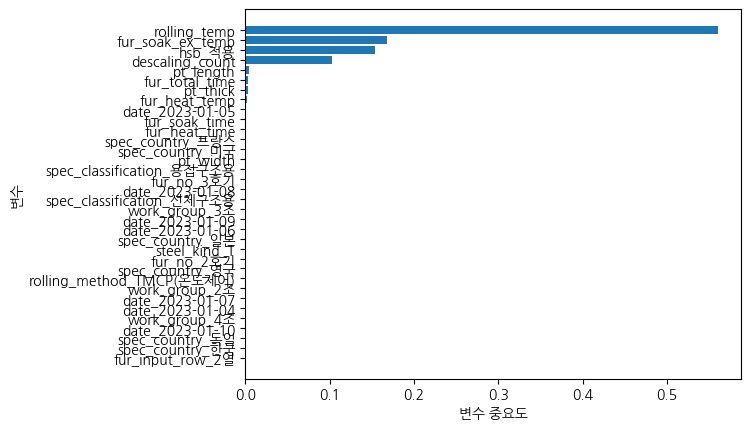

In [129]:
# 설명변수 중요도 그래프
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values('Importance', ascending = True , inplace = True)
coordinates = range(len(df_importance))
plt.barh(y= coordinates , width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

####  의사결정나무 / 랜덤 포레스트 / 그래디언트 부스팅 - 지표 확인


In [161]:
model = ["DecisionTree", "RandomForest", "GradientBoosting"]

Confusion matrix: 
[[190   1]
 [  4  63]] 

              precision    recall  f1-score   support

           0      0.979     0.995     0.987       191
           1      0.984     0.940     0.962        67

    accuracy                          0.981       258
   macro avg      0.982     0.968     0.974       258
weighted avg      0.981     0.981     0.980       258



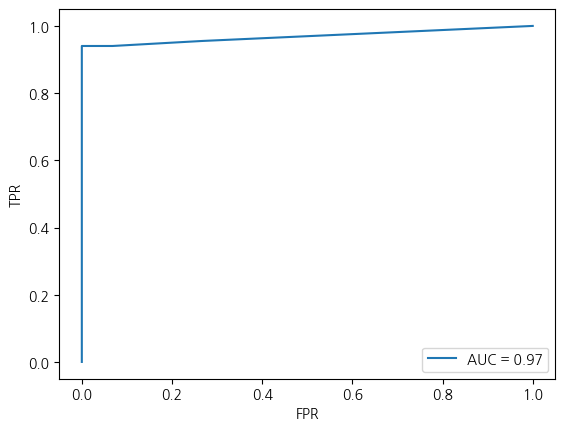

In [162]:
# 의사결정나무
train_accuracy = []; test_accuracy = []
model_auc = []
model_precision = []; model_recall = []
model_f1_score = []

dt_model = DecisionTreeClassifier(max_depth = 7, min_samples_split = 10, min_samples_leaf = 2, random_state = 2001)
dt_model.fit(df_train_x, df_train_y)

train_accuracy.append(dt_model.score(df_train_x, df_train_y))
test_accuracy.append(dt_model.score(df_test_x, df_test_y))

y_pred = dt_model.predict(df_test_x)
y_prob = dt_model.predict_proba(df_test_x)

print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits =3))

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob[:,1])
roc_auc = auc(fpr, tpr)

model_auc.append(roc_auc)

plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend (loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")

model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

Confusion matrix: 
[[191   0]
 [  7  60]] 

              precision    recall  f1-score   support

           0      0.965     1.000     0.982       191
           1      1.000     0.896     0.945        67

    accuracy                          0.973       258
   macro avg      0.982     0.948     0.963       258
weighted avg      0.974     0.973     0.972       258



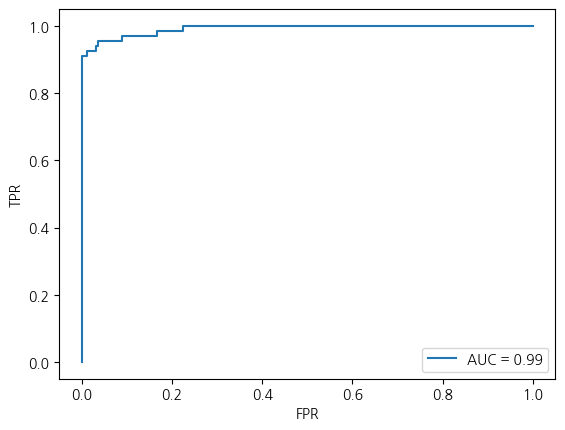

In [163]:
# 랜덤 포레스트
rf_model = RandomForestClassifier(min_samples_leaf=2, max_depth=8, min_samples_split = 10, random_state=2001)
rf_model.fit(df_train_x, df_train_y)
train_accuracy.append(rf_model.score(df_train_x, df_train_y))
test_accuracy.append(rf_model.score(df_test_x, df_test_y))
y_pred = rf_model.predict(df_test_x)
y_prob = rf_model.predict_proba(df_test_x)
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)), "\n")
print(classification_report(df_test_y, y_pred, digits=3))

# rOC_Cure(실제값, 예측값), fpr = FP/(FP+TN): 거짓 양성 비율, tpr= TP/(TP+FN): 진짜 양성 비율(재현율)

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob[:,1])
roc_auc = auc(fpr, tpr)
model_auc.append(roc_auc)

plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)
plt.legend (loc="lower right")
plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()


model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

Confusion matrix: 
[[191   0]
 [  0  67]] 

              precision    recall  f1-score   support

           0      1.000     1.000     1.000       191
           1      1.000     1.000     1.000        67

    accuracy                          1.000       258
   macro avg      1.000     1.000     1.000       258
weighted avg      1.000     1.000     1.000       258



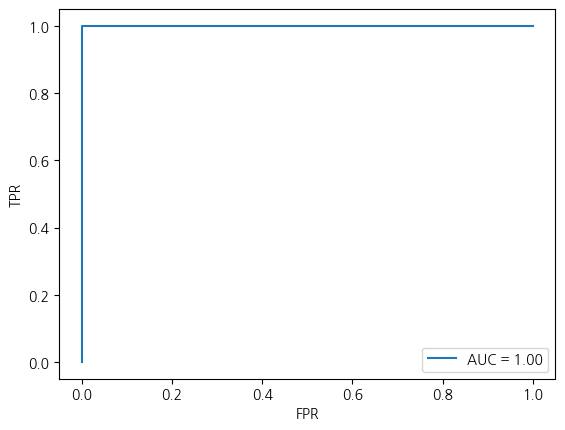

In [164]:
# 그래디언트 부스팅
gb_final = GradientBoostingClassifier(min_samples_leaf=10, max_depth=3, n_estimators= 100, learning_rate=0.1, random_state=2001)
gb_final.fit(df_train_x, df_train_y)
train_accuracy.append(gb_final.score(df_train_x, df_train_y))
test_accuracy.append(gb_final.score(df_test_x, df_test_y))
y_pred = gb_final.predict(df_test_x)
y_prob = gb_final.predict_proba(df_test_x)
print("Confusion matrix: \n{}". format(confusion_matrix(df_test_y, y_pred)),"\n")
print(classification_report(df_test_y, y_pred, digits=3))

# rOC_Cure(실제값, 예측값), fpr FP/(FP+TN) : 거짓 양성 비율, tor = TP/(TP+FN) : 진짜 양성 비율(재현율)

fpr, tpr, thresholds = roc_curve(df_test_y, y_prob[:, 1])

roc_auc = auc(fpr, tpr)

# aur

model_auc.append(roc_auc)


plt.plot(fpr, tpr, label= "AUC = %0.2f"% roc_auc)

plt.legend(loc="lower right")

plt.ylabel("TPR"); plt.xlabel("FPR")
plt.show()


model_precision.append(precision_score(df_test_y, y_pred))
model_recall.append(recall_score(df_test_y, y_pred))

model_f1_score.append(f1_score(df_test_y, y_pred))

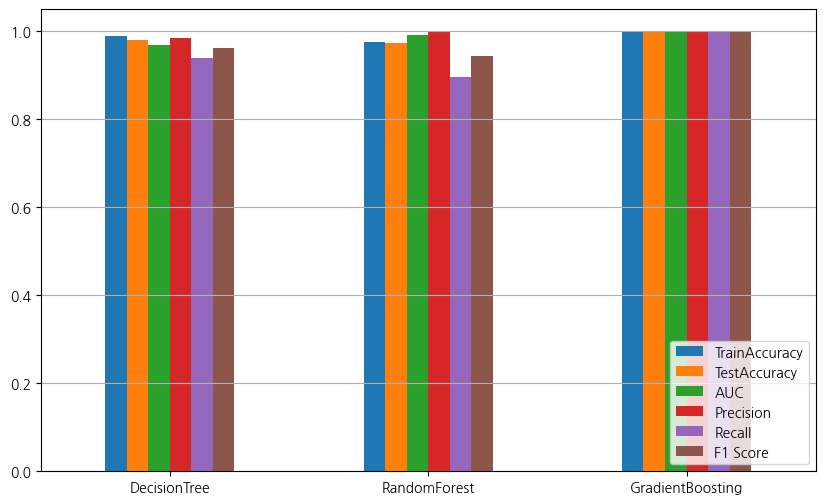

In [165]:
df_eval = pd.DataFrame(index = model)

df_eval["TrainAccuracy"] = train_accuracy
df_eval["TestAccuracy"] = test_accuracy

df_eval["AUC"] = model_auc

df_eval["Precision"] = model_precision
df_eval["Recall"] = model_recall

df_eval["F1 Score"] = model_f1_score

df_eval.round(3)

# 모델별 평가 지표 확인

df_eval.plot.bar(rot = 0, figsize= (10,6))

plt.legend (loc="lower right")

plt.grid (axis = "y")